<span style="color:blue; font-size:23pt"><ins>**Project: Moving Challenge:**</ins></span>

<br>
<br>
<br>

![alt text](2019Top100HiRes.jpg "Title")

<h4 align=justify>  I am attempting to use available datasets in conjunction with Foursquare and Google API's to determine the best place to move. I am using location data from my four favorite neighborhoods in my four favorite cities:<br> <ol> 1) La Jolla,an Diego, CA</ol> <ol>2) West Palm Beach, FL</ol> <ol>3) Downtown Chicago</ol> <ol>4) Portland, Maine</ol> I want to find the venues that best characterize a location combining attributes of each location with Foursquare.<br>
    I will cluster the data from:<br> <ol>1) Dallas, TX</ol> <ol>2) Jacksonville, FL</ol> <ol>3) Chicago, IL</ol> <ol>4) Austin, TX</ol> <ol>5) San Diego, CA</ol> I will find the neighborhoods most like my ideal match using SciKitlearn KMeans Clustering of Foursquare data. Next, a further segmentation by demographics, job availability, and income gathered from website and census data will help me choose my ideal neghborhood.  </h4>

<span style="color:green;font-size:20pt"> <ins>Data Collection:</ins></span>

<h4 align="justify"> <ins>First I will gather the neighborhood names from a variety of websites including:</ins>
<ol><a href="http://www.Wikipedia.com" target = _blank>Wikipedia.com</a></ol>
<ol><a href="http://www.Conservapedia.com" target = _blank>Conservapedia.com</a></ol><br>
I will parse them using a combination of pandas.read_html, BeautifulSoup, requests, and json.</h4>

In [582]:
#import modules and set pandas configuration
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

#Webscraoping modules from obtaining data from the web
import re
import requests
from bs4 import BeautifulSoup

#module to handle json requests and importation into pandas dataframe
import json
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

#import seaborn for distribution plot
imprt seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')


Libraries imported.


In [2]:
#load API keys for Foursqaure and Google Geolaction API from local file for security
with open(r'api_key.txt', 'r') as file:
    api_key = file.readline()
    CLIENT_ID = file.readline()
    CLIENT_SECRET = file.readline()
VERSION = '20180605' # Foursquare API version


<span style="font-size:16pt; color:red"><ins>San Diego, CA:</ins></span><br>
<span style="font-size:14pt; color:black">Neighborhood list</span>

In [3]:
#url for a list of neighborhoods in San Diego
url_sandiego = r'https://en.wikipedia.org/wiki/List_of_communities_and_neighborhoods_of_San_Diego'


In [359]:
#Using Beautiful Soup, extract neighborhood list from table(pd.read_html failed) and create a 
#neighborhood data frame

#Find all divs with sepcific style to obtain names
url_string=r'https://en.wikipedia.org/wiki/List_of_communities_and_neighborhoods_of_San_Diego'
page=requests.get(url_string)
page=page.text
soup=BeautifulSoup(page,features="html.parser")
results=soup.find_all("div", attrs={'style':'padding:0em 0.25em'})
neighborhood_list = []

for items in results:
    neighborhood_list.append(items.text.strip().split('\n'))  #split on newline
    
neighborhood_list = neighborhood_list[:-2]                    #remove uneeded information from list
neighborhood_list_2 = []

neighborhood_list_2 = [item for items in neighborhood_list for item in items]  #extract each item in row of list
        
sandiego_neighborhoods = pd.DataFrame(neighborhood_list_2, columns = ['Neighborhood']) #create dataframe

sandiego_neighborhoods['Neighborhood']=sandiego_neighborhoods['Neighborhood'].map(     #add city and State to name
    lambda x: x  + ', San Diego'  + ', CA')

sandiego_neighborhoods.head()


Neighborhood
0           Bay Ho, San Diego, CA
1         Bay Park, San Diego, CA
2    Carmel Valley, San Diego, CA
3       Clairemont, San Diego, CA
4  Del Mar Heights, San Diego, CA

<span style="font-size:16pt; color:red"><ins>Austin, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Neighborhood list</span>

In [12]:
url_austin = r'https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods'


In [13]:
table_austin = pd.read_html(url_austin)
table_austin = table_austin[0]
table_austin.drop(['COA ID#[nb 1]'], axis=1, inplace = True)
austin_neighborhoods = table_austin
austin_neighborhoods.rename(columns={'Name':'Neighborhood'}, inplace=True)
austin_neighborhoods['Neighborhood'] = austin_neighborhoods['Neighborhood'].map(lambda x: x +', Austin, '+ 'TX')
austin_neighborhoods.head()


Neighborhood
0     Bryker Woods, Austin, TX
1  Caswell Heights, Austin, TX
2  Downtown Austin, Austin, TX
3        Eastwoods, Austin, TX
4          Hancock, Austin, TX

<span style="font-size:16pt; color:red"><ins>Dallas, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Neighborhood list</span>

In [14]:
url_dallas = r'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Dallas'


In [15]:
#Reptition of above for Austin
table_dallas = pd.read_html(url_dallas)
table_dallas_concat = pd.DataFrame(columns=["Neighborhood"])
for i in range(1, len(table_dallas)):
    temp_table = pd.DataFrame(table_dallas[i].iloc[:,1])
    temp_table.rename(columns={temp_table.columns[0]:"Neighborhood"}, inplace=True)
    table_dallas_concat = table_dallas_concat.append(temp_table, ignore_index=True)
    temp_table = []
dallas_neighborhoods = table_dallas_concat


In [16]:
def remove_website_str(x):
    """Remove website from city names"""
    if x.startswith('website'):
        x = x.split()
        x=' '.join(x[1:])
    return x

In [18]:
#Remove website string
dallas_neighborhood_clean = dallas_neighborhoods['Neighborhood'].apply(remove_website_str)
dallas_neighborhood_clean = pd.DataFrame(dallas_neighborhood_clean, columns = ['Neighborhood'])
#Remove uneeded rows from dataframe
dallas_neighborhood_clean.drop(index=[205, 206, 207, 208, 209], inplace = True)
#Add City and State
dallas_neighborhood_clean['Neighborhood'] = dallas_neighborhood_clean['Neighborhood'].map(
    lambda x: x +', Dallas, '+ 'TX')
dallas_neighborhood_clean.head()


Neighborhood
0        Baylor District, Dallas, TX
1             The Cedars, Dallas, TX
2  Civic Center District, Dallas, TX
3   Dallas Arts District, Dallas, TX
4  Dallas Farmers Market, Dallas, TX

<span style="font-size:16pt; color:red"><ins>Chicago, IL:</ins></span><br>
<span style="font-size:14pt; color:black">Neighborhood list</span>

In [20]:
url_chicago = r'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago'


In [21]:
#Reptition of Austin --webscrape Wikipedia Table
table_chicago = pd.read_html(url_chicago)
table_chicago = table_chicago[0]
table_chicago.drop(['Community area'], axis=1, inplace=True)
chicago_neighborhoods = table_chicago
chicago_neighborhoods['Neighborhood'] = chicago_neighborhoods['Neighborhood'].map(lambda x: x +', Chicago, '+ 'IL')
chicago_neighborhoods.head()


Neighborhood
0      Albany Park, Chicago, IL
1  Altgeld Gardens, Chicago, IL
2    Andersonville, Chicago, IL
3   Archer Heights, Chicago, IL
4    Armour Square, Chicago, IL

<span style="font-size:16pt; color:red"><ins>Jacksonville, FL:</ins></span><br>
<span style="font-size:14pt; color:black">Neighborhood list</span>

In [22]:
jacksonville_neighborhoods = pd.DataFrame(columns=['Neighborhood'])  #Create empty dataframe
#USe consevapedia -- wikipedia no neghborhood data
url_string=r'https://www.conservapedia.com/Neighborhoods_of_Jacksonville,_Florida'


In [23]:
page=requests.get(url_string)
page=page.text
soup=BeautifulSoup(page,features="html.parser")
results=soup.find_all("li", class_="toclevel-2")     #find all lists with specific class

for index, item in enumerate(results):
    area = item.find("span", class_="toctext").text  #extract specific elements from list and append data
    jacksonville_neighborhoods = jacksonville_neighborhoods.append({'Neighborhood':area}, ignore_index=True) 

    jacksonville_neighborhoods['Neighborhood'] = jacksonville_neighborhoods['Neighborhood'].map(
    lambda x: x +', Jacksonville, '+ 'FL'
)
jacksonville_neighborhoods.head()


Neighborhood
0             Argyle, Jacksonville, FL
1           Avondale, Jacksonville, FL
2        Cedar Hills, Jacksonville, FL
3  Confederate Point, Jacksonville, FL
4         Lake Shore, Jacksonville, FL

<h2 align=justify style="color:green"> <ins>Obtaining Longitude, Latitude, Zipcode from Goodle API</ins></h2>
    <h3>
    I will obtain them using a custom functions fro json extraction</h3>

In [33]:
#function to only append one returned value for longitude and latitude
def get_lng_lat_zip(neighborhoods):
    """Using Google API, request longtiude and latitude by neighborhood name"""
    location_lng_lat = []
    for i in range(len(neighborhoods)):
        url = r'https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'.format(neighborhoods['Neighborhood'][i], api_key)
        r = requests.get(url)
        json_r = json.loads(r.text)
        #build data frame from returned data only using firts returned value
        location_pd = json_normalize(json_r['results'])
        location_lng_lat_temp =  (location_pd[['geometry.location.lat', 'geometry.location.lng']])
        location_lng_lat.append([(location_lng_lat_temp.iloc[0,:])[0], (location_lng_lat_temp.iloc[0,:])[1]])
            
    return location_lng_lat 


In [54]:
def zip_nb(neighborhoods):
    """Request zip code by longitude and latitude data"""
    zip_pd_temp = []
    for i in range(len(neighborhoods)):
        #try except loop if no value is returned
        try: 
            url_2 = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={},{}&key={}'.format(neighborhoods['Latitude'][i], neighborhoods['Longitude'][i],api_key)
            r = requests.get(url_2)
            json_r = json.loads(r.text)
            #normalize specific section of returned json onject
            location_pd_3 = json_normalize(json_r['results'][0]['address_components'])
            count=0
            #check for value in zip code data -- if none add NA

            for line in location_pd_3.values:
                if 'postal_code' in line[2]:
                    zip_code = line[0]
                    count=1
                if count != 1:
                    zip_code = 'NA'
            zip_pd_temp.append(zip_code)
            count=0
        except IndexError:
            zip_code = 'NA'
            zip_pd_temp.append(zip_code)
            count=0
    zip_pd = pd.DataFrame(zip_pd_temp, columns = ['zip_code'])
    return(zip_pd) 


<span style="font-size:16pt; color:red"><ins>San Diego, CA:</ins></span><br>
<span style="font-size:14pt; color:black">Latitude, Longitude, Zipcode</span>

In [43]:
sandiego_neighborhoods_zip = get_lng_lat_zip(sandiego_neighborhoods)   #run zipcode function
sandiego_neighborhoods_zip = pd.DataFrame(sandiego_neighborhoods_zip, columns=['Latitude', 'Longitude'])
sandiego_nb_lng_lat = pd.concat([sandiego_neighborhoods,               #creat dataframe with lng and lat data
                                    sandiego_neighborhoods_zip],
                                   axis=1)
sandiego_nb_lng_lat.head()


Neighborhood   Latitude   Longitude
0           Bay Ho, San Diego, CA  32.824243 -117.217637
1         Bay Park, San Diego, CA  32.791837 -117.199996
2    Carmel Valley, San Diego, CA  32.939827 -117.202936
3       Clairemont, San Diego, CA  32.824140 -117.193697
4  Del Mar Heights, San Diego, CA  32.948378 -117.260870

In [46]:
sandiego_zip_pd = zip_nb(sandiego_nb_lng_lat)              #Run Zip code function 
sandiego_zip_lng_lat = pd.concat([sandiego_nb_lng_lat,     #Append results to neghborhood dataframe
                                     sandiego_zip_pd],
                                    axis=1)
sandiego_zip_lng_lat.head()


Neighborhood   Latitude   Longitude zip_code
0           Bay Ho, San Diego, CA  32.824243 -117.217637    92117
1         Bay Park, San Diego, CA  32.791837 -117.199996    92117
2    Carmel Valley, San Diego, CA  32.939827 -117.202936    92130
3       Clairemont, San Diego, CA  32.824140 -117.193697    92117
4  Del Mar Heights, San Diego, CA  32.948378 -117.260870    92014

In [109]:
#Remove any rows without zip code
sandiego_filter = sandiego_zip_lng_lat['zip_code'].apply(lambda x: x != 'NA')
sandiego_zip_lng_lat=sandiego_zip_lng_lat[sandiego_filter]
sandiego_zip_lng_lat.head()

Neighborhood   Latitude   Longitude zip_code
0           Bay Ho, San Diego, CA  32.824243 -117.217637    92117
1         Bay Park, San Diego, CA  32.791837 -117.199996    92117
2    Carmel Valley, San Diego, CA  32.939827 -117.202936    92130
3       Clairemont, San Diego, CA  32.824140 -117.193697    92117
4  Del Mar Heights, San Diego, CA  32.948378 -117.260870    92014

In [110]:
#reset indices
sandiego_zip_lng_lat = sandiego_zip_lng_lat.reset_index(drop=True)
sandiego_zip_lng_lat.head()

Neighborhood   Latitude   Longitude zip_code
0           Bay Ho, San Diego, CA  32.824243 -117.217637    92117
1         Bay Park, San Diego, CA  32.791837 -117.199996    92117
2    Carmel Valley, San Diego, CA  32.939827 -117.202936    92130
3       Clairemont, San Diego, CA  32.824140 -117.193697    92117
4  Del Mar Heights, San Diego, CA  32.948378 -117.260870    92014

<span style="font-size:16pt; color:red"><ins>Austin, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Latitude, Longitude, Zipcode</span>

In [47]:
#Repeat as above for San Diego
austin_neighborhoods_zip = get_lng_lat_zip(austin_neighborhoods)   #run zipcode function
austin_neighborhoods_zip = pd.DataFrame(austin_neighborhoods_zip, columns=['Latitude', 'Longitude'])
austin_nb_lng_lat = pd.concat([austin_neighborhoods,               #creat dataframe with lng and lat data
                                    austin_neighborhoods_zip],
                                   axis=1)
austin_nb_lng_lat.head()


Neighborhood   Latitude  Longitude
0     Bryker Woods, Austin, TX  30.302450 -97.753893
1  Caswell Heights, Austin, TX  30.307765 -97.719435
2  Downtown Austin, Austin, TX  30.272921 -97.744386
3        Eastwoods, Austin, TX  30.290371 -97.726479
4          Hancock, Austin, TX  30.296469 -97.723215

In [48]:
#Repeat as above for San Diego
austin_zip_pd = zip_nb(austin_nb_lng_lat)
austin_zip_lng_lat = pd.concat([austin_nb_lng_lat,
                                     austin_zip_pd],
                                    axis=1)
austin_zip_lng_lat.head()


Neighborhood   Latitude  Longitude zip_code
0     Bryker Woods, Austin, TX  30.302450 -97.753893    78703
1  Caswell Heights, Austin, TX  30.307765 -97.719435    78751
2  Downtown Austin, Austin, TX  30.272921 -97.744386    78701
3        Eastwoods, Austin, TX  30.290371 -97.726479    78705
4          Hancock, Austin, TX  30.296469 -97.723215    78705

In [108]:
#reset indices
austin_zip_lng_lat = austin_zip_lng_lat.reset_index(drop=True)
austin_zip_lng_lat.head()


Neighborhood   Latitude  Longitude zip_code
0     Bryker Woods, Austin, TX  30.302450 -97.753893    78703
1  Caswell Heights, Austin, TX  30.307765 -97.719435    78751
2  Downtown Austin, Austin, TX  30.272921 -97.744386    78701
3        Eastwoods, Austin, TX  30.290371 -97.726479    78705
4          Hancock, Austin, TX  30.296469 -97.723215    78705

<span style="font-size:16pt; color:red"><ins>Dallas, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Latitude, Longitude, Zipcode</span>

In [51]:
#Repeat as above -- see San Diego for details
dallas_neighborhoods_zip = get_lng_lat_zip(dallas_neighborhood_clean)   #run zipcode function
dallas_neighborhoods_zip = pd.DataFrame(dallas_neighborhoods_zip, columns=['Latitude', 'Longitude'])
dallas_nb_lng_lat = pd.concat([dallas_neighborhoods,               #creat dataframe with lng and lat data
                                    dallas_neighborhoods_zip],
                                   axis=1)
dallas_nb_lng_lat.head()


Neighborhood   Latitude  Longitude
0        Baylor District  32.789342 -96.779515
1             The Cedars  32.765124 -96.789371
2  Civic Center District  32.774389 -96.800285
3   Dallas Arts District  32.789731 -96.798262
4  Dallas Farmers Market  32.777495 -96.789263

In [57]:
dallas_nb_lng_lat = pd.concat([dallas_neighborhood_clean,               #create dataframe with lng and lat data
                                    dallas_neighborhoods_zip],
                                   axis=1)
dallas_nb_lng_lat.head()


Neighborhood   Latitude  Longitude
0        Baylor District, Dallas, TX  32.789342 -96.779515
1             The Cedars, Dallas, TX  32.765124 -96.789371
2  Civic Center District, Dallas, TX  32.774389 -96.800285
3   Dallas Arts District, Dallas, TX  32.789731 -96.798262
4  Dallas Farmers Market, Dallas, TX  32.777495 -96.789263

In [58]:
#Same as above -- see San Diego for details
dallas_zip_pd = zip_nb(dallas_nb_lng_lat)
dallas_zip_lng_lat = pd.concat([dallas_nb_lng_lat,
                                     dallas_zip_pd],
                                    axis=1)
dallas_zip_lng_lat.head()


Neighborhood   Latitude  Longitude zip_code
0        Baylor District, Dallas, TX  32.789342 -96.779515    75246
1             The Cedars, Dallas, TX  32.765124 -96.789371    75215
2  Civic Center District, Dallas, TX  32.774389 -96.800285    75202
3   Dallas Arts District, Dallas, TX  32.789731 -96.798262    75201
4  Dallas Farmers Market, Dallas, TX  32.777495 -96.789263    75201

In [107]:
#reset indices
dallas_zip_lng_lat=dallas_zip_lng_lat.reset_index(drop=True)
dallas_zip_lng_lat.head()

Neighborhood   Latitude  Longitude zip_code
0        Baylor District, Dallas, TX  32.789342 -96.779515    75246
1             The Cedars, Dallas, TX  32.765124 -96.789371    75215
2  Civic Center District, Dallas, TX  32.774389 -96.800285    75202
3   Dallas Arts District, Dallas, TX  32.789731 -96.798262    75201
4  Dallas Farmers Market, Dallas, TX  32.777495 -96.789263    75201

<span style="font-size:16pt; color:red"><ins>Chicago, IL:</ins></span><br>
<span style="font-size:14pt; color:black">Latitude, Longitude, Zipcode</span>

In [60]:
#Repeat as above for San Diego -- see San Diego
chicago_neighborhoods_zip = get_lng_lat_zip(chicago_neighborhoods)   #run zipcode function
chicago_neighborhoods_zip = pd.DataFrame(chicago_neighborhoods_zip, columns=['Latitude', 'Longitude'])
chicago_nb_lng_lat = pd.concat([chicago_neighborhoods,               #creat dataframe with lng and lat data
                                    chicago_neighborhoods_zip],
                                   axis=1)
chicago_nb_lng_lat.head()


Neighborhood   Latitude  Longitude
0      Albany Park, Chicago, IL  41.968327 -87.728028
1  Altgeld Gardens, Chicago, IL  41.654165 -87.599686
2    Andersonville, Chicago, IL  41.979572 -87.670077
3   Archer Heights, Chicago, IL  41.807900 -87.723585
4    Armour Square, Chicago, IL  41.840755 -87.634019

In [73]:
#Repeat as above for San Diego -- see San Diego
chicago_zip_pd = zip_nb(chicago_nb_lng_lat)
chicago_zip_lng_lat = pd.concat([chicago_nb_lng_lat,
                                     chicago_zip_pd],
                                    axis=1)
#Remove any rows without zip code
chicago_filter = chicago_zip_lng_lat['zip_code'].apply(lambda x: x != 'NA')
chicago_zip_lng_lat=chicago_zip_lng_lat[chicago_filter].reset_index(drop=True)
chicago_zip_lng_lat.head()


Neighborhood   Latitude  Longitude zip_code
1  Altgeld Gardens, Chicago, IL  41.654165 -87.599686    60827
2    Andersonville, Chicago, IL  41.979572 -87.670077    60640
3   Archer Heights, Chicago, IL  41.807900 -87.723585    60632
4    Armour Square, Chicago, IL  41.840755 -87.634019    60616
5          Ashburn, Chicago, IL  41.749690 -87.712007    60652

In [106]:
#reset indices
chicago_zip_lng_lat=chicago_zip_lng_lat.reset_index(drop=True)
chicago_zip_lng_lat.head()

Neighborhood   Latitude  Longitude zip_code
0  Altgeld Gardens, Chicago, IL  41.654165 -87.599686    60827
1    Andersonville, Chicago, IL  41.979572 -87.670077    60640
2   Archer Heights, Chicago, IL  41.807900 -87.723585    60632
3    Armour Square, Chicago, IL  41.840755 -87.634019    60616
4          Ashburn, Chicago, IL  41.749690 -87.712007    60652

<span style="font-size:16pt; color:red"><ins>Jacksonville, FL:</ins></span><br>
<span style="font-size:14pt; color:black">Latitude, Longitude, Zipcode</span>

In [62]:
#Repeat as above for San Diego -- See San Diego
jacksonville_neighborhoods_zip = get_lng_lat_zip(jacksonville_neighborhoods)   #run zipcode function
jacksonville_neighborhoods_zip = pd.DataFrame(jacksonville_neighborhoods_zip, columns=['Latitude', 'Longitude'])
jacksonville_nb_lng_lat = pd.concat([jacksonville_neighborhoods,               #creat dataframe with lng and lat data
                                    jacksonville_neighborhoods_zip],
                                   axis=1)
jacksonville_nb_lng_lat.head()


Neighborhood   Latitude  Longitude
0             Argyle, Jacksonville, FL  30.196921 -81.756282
1           Avondale, Jacksonville, FL  30.296769 -81.710315
2        Cedar Hills, Jacksonville, FL  30.253614 -81.756138
3  Confederate Point, Jacksonville, FL  30.256893 -81.736310
4         Lake Shore, Jacksonville, FL  30.280630 -81.726734

In [63]:
#Repeat as above for San Diego -- See San Diego
jacksonville_zip_pd = zip_nb(jacksonville_nb_lng_lat)
jacksonville_zip_lng_lat = pd.concat([jacksonville_nb_lng_lat,
                                     jacksonville_zip_pd],
                                    axis=1)
jacksonville_zip_lng_lat.head()


Neighborhood   Latitude  Longitude zip_code
0             Argyle, Jacksonville, FL  30.196921 -81.756282    32244
1           Avondale, Jacksonville, FL  30.296769 -81.710315    32205
2        Cedar Hills, Jacksonville, FL  30.253614 -81.756138    32210
3  Confederate Point, Jacksonville, FL  30.256893 -81.736310    32210
4         Lake Shore, Jacksonville, FL  30.280630 -81.726734    32210

In [111]:
#reset indices
jacksonville_zip_lng_lat = jacksonville_zip_lng_lat.reset_index(drop=True)
jacksonville_zip_lng_lat.head()

Neighborhood   Latitude  Longitude zip_code
0             Argyle, Jacksonville, FL  30.196921 -81.756282    32244
1           Avondale, Jacksonville, FL  30.296769 -81.710315    32205
2        Cedar Hills, Jacksonville, FL  30.253614 -81.756138    32210
3  Confederate Point, Jacksonville, FL  30.256893 -81.736310    32210
4         Lake Shore, Jacksonville, FL  30.280630 -81.726734    32210

<h2 align=justify style="color:green"> <ins>Obtaining Demographic Data By Zipcode for each Neighborhood</ins></h2>
    <h3>
    I will obtain them using a custom functions from <a href="http://www.zipwho.com" target = _blank>ZipWho.com<a></h3>

In [358]:
#Function to extract data from zipwho.com
def zip_demographics(neighborhood_zip):
    """Function extracts data from zipwho. Firefox emulation to retrieve data. Tra and except for zip codes
    with no current data. Extract data from result string with string manipulation and list manipulation"""
    zip_list = []
    zip_list_nan = ['N/A' for i in range(37)]  #add N/A for all 37 demographic entries
    for i in range(len(neighborhood_zip)):
        url_zip = 'https://zipwho.com/?zip={}-&city=&filters=--_--_--_--&state=&mode=zip'.format(neighborhood_zip['zip_code'][i])
        #emulate Firefox to avoid dread 403 Forbidden
        headers ={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:68.0) Gecko/20100101 Firefox/68.0'}
        page=requests.get(url_zip, headers=headers)                 #Creat soup with requests and BS4
        page=page.text
        soup=BeautifulSoup(page,features="html.parser")
        start_index = str(soup.contents[4]).index('return')
        end_index = str(soup.contents[4]).index('}')
        #if no data present append N/A list
        try:
            string_data = str(soup.contents[4])[start_index+8:end_index-4]
            string_data_split = string_data.split('\\n')
            data = string_data_split[1].split(',')
            numbers = string_data_split[0].split(',')
            zip_list.append(data)
        except IndexError:
            zip_list.append(zip_list_nan)
    zip_list_pd = pd.DataFrame(zip_list, columns = numbers)
    zip_list_pd.rename(columns ={'zip':'zip_code'}, inplace = True)
    zip_list_pd.drop(columns=['city', 'state'], inplace=True)
    return zip_list_pd


<span style="font-size:16pt; color:red"><ins>San Diego, CA:</ins></span><br>
<span style="font-size:14pt; color:black">Demographic Data</span>

In [116]:
#get demographics with zip code data
sandiego_zip_list = zip_demographics(sandiego_zip_lng_lat)
sandiego_zip_list.head()


zip_code MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0    92117        47245               71             241.2               91   
1    92117        47245               71             241.2               91   
2    92130        93929               98             491.3               98   
3    92117        47245               71             241.2               91   
4    92014        97029               98             748.5               99   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        26.1                         93   
1                        26.1                         93   
2                        25.0                         90   
3                        26.1                         93   
4                        25.2                         90   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      58.9                     14               5.0   
1                      58.9                     14               5.0   
2                      77.1                     50               6.1   
3                      58.9                     14               5.0   
4                      72.3                     35               5.9   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    16                 31.2                81   
1                    16                 31.2                81   
2                    81                 72.9                99   
3                    16                 31.2                81   
4                    73                 71.3                99   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                41.3               84      51197             97   
1                41.3               84      51197             97   
2                70.4               99      28172             84   
3                41.3               84      51197             97   
4                68.5               99      14084             65   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.4                       29      37.7            57   
1                  2.4                       29      37.7            57   
2                  2.6                       60      35.9            37   
3                  2.4                       29      37.7            57   
4                  2.2                        7      44.4            95   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              93.2               55           52.2          16   
1              93.2               55           52.2          16   
2              89.2               33           65.5          76   
3              93.2               55           52.2          16   
4              95.8               68           60.5          45   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            11.5           78         69.3        24          1.6        51   
1            11.5           78         69.3        24          1.6        51   
2             9.6           53         76.1        30          0.7        39   
3            11.5           78         69.3        24          1.6        51   
4            13.1           91         88.2        48          1.0        44   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          9.0        95                     15.7                    87  
1          9.0        95                     15.7                    87  
2         13.9        97                      5.9                    73  
3          9.0        95                     15.7                    87  
4          4.4        89                      4.1                    67

In [584]:
sandiego_zip_list.shape

(115, 35)

In [121]:
#Merged dataframes with all current data and rename columns
sandiego_data_merged = pd.merge(sandiego_zip_lng_lat, sandiego_zip_list, right_index=True, left_index=True)
sandiego_data_merged = sandiego_data_merged.drop('zip_code_y', axis=1)
sandiego_data_merged.rename(columns={'zip_code_x':'Zip Code'}, inplace=True)
sandiego_data_merged.head()


Neighborhood   Latitude   Longitude Zip Code  \
0           Bay Ho, San Diego, CA  32.824243 -117.217637    92117   
1         Bay Park, San Diego, CA  32.791837 -117.199996    92117   
2    Carmel Valley, San Diego, CA  32.939827 -117.202936    92130   
3       Clairemont, San Diego, CA  32.824140 -117.193697    92117   
4  Del Mar Heights, San Diego, CA  32.948378 -117.260870    92014   

  MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0        47245               71             241.2               91   
1        47245               71             241.2               91   
2        93929               98             491.3               98   
3        47245               71             241.2               91   
4        97029               98             748.5               99   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        26.1                         93   
1                        26.1                         93   
2                        25.0                         90   
3                        26.1                         93   
4                        25.2                         90   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      58.9                     14               5.0   
1                      58.9                     14               5.0   
2                      77.1                     50               6.1   
3                      58.9                     14               5.0   
4                      72.3                     35               5.9   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    16                 31.2                81   
1                    16                 31.2                81   
2                    81                 72.9                99   
3                    16                 31.2                81   
4                    73                 71.3                99   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                41.3               84      51197             97   
1                41.3               84      51197             97   
2                70.4               99      28172             84   
3                41.3               84      51197             97   
4                68.5               99      14084             65   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.4                       29      37.7            57   
1                  2.4                       29      37.7            57   
2                  2.6                       60      35.9            37   
3                  2.4                       29      37.7            57   
4                  2.2                        7      44.4            95   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              93.2               55           52.2          16   
1              93.2               55           52.2          16   
2              89.2               33           65.5          76   
3              93.2               55           52.2          16   
4              95.8               68           60.5          45   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            11.5           78         69.3        24          1.6        51   
1            11.5           78         69.3        24          1.6        51   
2             9.6           53         76.1        30          0.7        39   
3            11.5           78         69.3        24          1.6        51   
4            13.1           91         88.2        48          1.0        44   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          9.0        95                     15.7                    87  
1          9.0        95                     15.7                    87  
2         13.9        97    

In [139]:
#Remove data with no demographics available
sandiego_filter = sandiego_data_merged['MedianIncome'].apply(lambda x: x != 'N/A')
sandiego_filtered=sandiego_data_merged[sandiego_filter]
#remove neighborhoods in same zip with same demographics keeping first listed
sandiego_filtered.drop_duplicates(subset=['Zip Code'], keep='first', inplace=True)
sandiego_filtered.reset_index(drop=True, inplace=True)
sandiego_filtered.head()


C:\Users\gtm12\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Neighborhood   Latitude   Longitude Zip Code  \
0           Bay Ho, San Diego, CA  32.824243 -117.217637    92117   
1    Carmel Valley, San Diego, CA  32.939827 -117.202936    92130   
2  Del Mar Heights, San Diego, CA  32.948378 -117.260870    92014   
3         La Jolla, San Diego, CA  32.832811 -117.271272    92037   
4    Mission Beach, San Diego, CA  32.770653 -117.251445    92109   

  MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0        47245               71             241.2               91   
1        93929               98             491.3               98   
2        97029               98             748.5               99   
3        68691               92             682.8               99   
4        45202               66             373.7               97   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        26.1                         93   
1                        25.0                         90   
2                        25.2                         90   
3                        26.4                         94   
4                        29.2                         98   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      58.9                     14               5.0   
1                      77.1                     50               6.1   
2                      72.3                     35               5.9   
3                      61.1                     16               5.1   
4                      29.8                      2               3.7   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    16                 31.2                81   
1                    81                 72.9                99   
2                    73                 71.3                99   
3                    21                 67.7                99   
4                     2                 50.8                94   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                41.3               84      51197             97   
1                70.4               99      28172             84   
2                68.5               99      14084             65   
3                63.8               98      42826             95   
4                48.1               91      45834             96   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.4                       29      37.7            57   
1                  2.6                       60      35.9            37   
2                  2.2                        7      44.4            95   
3                  2.4                       29      38.4            64   
4                  1.9                        1      30.9             9   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              93.2               55           52.2          16   
1              89.2               33           65.5          76   
2              95.8               68           60.5          45   
3              90.8               42           48.1          10   
4             122.6               97           30.7           0   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            11.5           78         69.3        24          1.6        51   
1             9.6           53         76.1        30          0.7        39   
2            13.1           91         88.2        48          1.0        44   
3             9.4           49         77.9        32          0.7        39   
4            10.9           71         81.5        36          1.3        48   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          9.0        95                     15.7                    87  
1         13.9        97                      5.9                    73  
2          4.4        89    

In [157]:
#Remove all columns including 'Rank' as they are unnecessary with other data included
col_list = sandiego_filtered.columns
new_col_list = []
for col in col_list:
    if 'Rank' not in col:
        new_col_list.append(col)
sandiego_filtered = sandiego_filtered[new_col_list]
sandiego_filtered.head()


Neighborhood   Latitude   Longitude Zip Code  \
0           Bay Ho, San Diego, CA  32.824243 -117.217637    92117   
1    Carmel Valley, San Diego, CA  32.939827 -117.202936    92130   
2  Del Mar Heights, San Diego, CA  32.948378 -117.260870    92014   
3         La Jolla, San Diego, CA  32.832811 -117.271272    92037   
4    Mission Beach, San Diego, CA  32.770653 -117.251445    92109   

  MedianIncome CostOfLivingIndex MedianMortgageToIncomeRatio  \
0        47245             241.2                        26.1   
1        93929             491.3                        25.0   
2        97029             748.5                        25.2   
3        68691             682.8                        26.4   
4        45202             373.7                        29.2   

  OwnerOccupiedHomesPercent MedianRoomsInHome CollegeDegreePercent  \
0                      58.9               5.0                 31.2   
1                      77.1               6.1                 72.9   
2                      72.3               5.9                 71.3   
3                      61.1               5.1                 67.7   
4                      29.8               3.7                 50.8   

  ProfessionalPercent Population AverageHouseholdSize MedianAge  \
0                41.3      51197                  2.4      37.7   
1                70.4      28172                  2.6      35.9   
2                68.5      14084                  2.2      44.4   
3                63.8      42826                  2.4      38.4   
4                48.1      45834                  1.9      30.9   

  MaleToFemaleRatio MarriedPercent DivorcedPercent WhitePercent BlackPercent  \
0              93.2           52.2            11.5         69.3          1.6   
1              89.2           65.5             9.6         76.1          0.7   
2              95.8           60.5            13.1         88.2          1.0   
3              90.8           48.1             9.4         77.9          0.7   
4             122.6           30.7            10.9         81.5          1.3   

  AsianPercent HispanicEthnicityPercent  
0          9.0                     15.7  
1         13.9                      5.9  
2          4.4                      4.1  
3         11.2                      7.1  
4          3.0                     10.3

In [158]:
#save to csv for later use
sandiego_filtered.to_csv('sandiego_filtered.csv')


<span style="font-size:16pt; color:red"><ins>Austin, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Demographic Data</span>

In [113]:
#get demographics with zip code data
austin_zip_list = zip_demographics(austin_zip_lng_lat)
austin_zip_list.head()

zip_code MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0    78703        54591               81             326.0               96   
1    78751        29779               18             160.5               78   
2    78701        35757               40             199.8               87   
3    78705        14740                0             185.5               84   
4    78705        14740                0             185.5               84   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        21.1                         50   
1                        23.5                         80   
2                        23.9                         83   
3                        21.5                         56   
4                        21.5                         56   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      51.5                      8               4.8   
1                      25.9                      1               3.6   
2                      37.7                      4               3.3   
3                      11.0                      0               2.8   
4                      11.0                      0               2.8   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    10                 74.1                99   
1                     1                 55.3                96   
2                     1                 46.2                92   
3                     0                 73.0                99   
4                     0                 73.0                99   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                68.1               99      19522             73   
1                49.7               92      13829             64   
2                48.9               92       3780             30   
3                45.8               89      26972             83   
4                45.8               89      26972             83   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.0                        2      34.5            25   
1                  1.8                        0      28.1             3   
2                  2.2                        6      36.1            39   
3                  2.7                       72      21.2             0   
4                  2.7                       72      21.2             0   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              97.7               75           50.4          13   
1             122.2               97           27.6           0   
2             180.6               99           32.8           1   
3             140.7               98           13.4           0   
4             140.7               98           13.4           0   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0             9.7           54         81.7        36          1.5        50   
1            10.4           64         67.3        22          1.5        50   
2            14.0           94         66.8        22          9.8        76   
3             2.8            0         69.1        24          2.4        56   
4             2.8            0         69.1        24          2.4        56   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          6.8        93                      7.6                    77  
1          6.8        93                     21.6                    90  
2          4.4        90                     15.4                    87  
3         15.0        97                     10.3                    82  
4         15.0        97                     10.3                    82

In [130]:
#Merged dataframes with all current data and rename columns
austin_data_merged = pd.merge(austin_zip_lng_lat, austin_zip_list, right_index=True, left_index=True)
austin_data_merged = austin_data_merged.drop('zip_code_y', axis=1)
austin_data_merged.rename(columns={'zip_code_x':'Zip Code'}, inplace=True)
austin_data_merged.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0     Bryker Woods, Austin, TX  30.302450 -97.753893    78703        54591   
1  Caswell Heights, Austin, TX  30.307765 -97.719435    78751        29779   
2  Downtown Austin, Austin, TX  30.272921 -97.744386    78701        35757   
3        Eastwoods, Austin, TX  30.290371 -97.726479    78705        14740   
4          Hancock, Austin, TX  30.296469 -97.723215    78705        14740   

  MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0               81             326.0               96   
1               18             160.5               78   
2               40             199.8               87   
3                0             185.5               84   
4                0             185.5               84   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        21.1                         50   
1                        23.5                         80   
2                        23.9                         83   
3                        21.5                         56   
4                        21.5                         56   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      51.5                      8               4.8   
1                      25.9                      1               3.6   
2                      37.7                      4               3.3   
3                      11.0                      0               2.8   
4                      11.0                      0               2.8   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    10                 74.1                99   
1                     1                 55.3                96   
2                     1                 46.2                92   
3                     0                 73.0                99   
4                     0                 73.0                99   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                68.1               99      19522             73   
1                49.7               92      13829             64   
2                48.9               92       3780             30   
3                45.8               89      26972             83   
4                45.8               89      26972             83   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.0                        2      34.5            25   
1                  1.8                        0      28.1             3   
2                  2.2                        6      36.1            39   
3                  2.7                       72      21.2             0   
4                  2.7                       72      21.2             0   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              97.7               75           50.4          13   
1             122.2               97           27.6           0   
2             180.6               99           32.8           1   
3             140.7               98           13.4           0   
4             140.7               98           13.4           0   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0             9.7           54         81.7        36          1.5        50   
1            10.4           64         67.3        22          1.5        50   
2            14.0           94         66.8        22          9.8        76   
3             2.8            0         69.1        24          2.4        56   
4             2.8            0         69.1        24          2.4        56   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          6.8        93                      7.6                    77  
1          6.8        93                     21.6                    90  
2          4.4        90                     15.4

In [136]:
#Remove data with no demographics available
austin_filter = austin_data_merged['MedianIncome'].apply(lambda x: x != 'N/A')
austin_filtered = austin_data_merged[austin_filter]
#remove neighborhoods in same zip with same demographics keeping first listed
austin_filtered.drop_duplicates(subset=['Zip Code'], keep='first', inplace=True)
austin_filtered.reset_index(drop=True, inplace=True)
austin_filtered.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0     Bryker Woods, Austin, TX  30.302450 -97.753893    78703        54591   
1  Caswell Heights, Austin, TX  30.307765 -97.719435    78751        29779   
2  Downtown Austin, Austin, TX  30.272921 -97.744386    78701        35757   
3        Eastwoods, Austin, TX  30.290371 -97.726479    78705        14740   
4  Oakmont Heights, Austin, TX  30.311722 -97.754573    78731        62404   

  MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0               81             326.0               96   
1               18             160.5               78   
2               40             199.8               87   
3                0             185.5               84   
4               89             275.7               94   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        21.1                         50   
1                        23.5                         80   
2                        23.9                         83   
3                        21.5                         56   
4                        22.3                         67   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      51.5                      8               4.8   
1                      25.9                      1               3.6   
2                      37.7                      4               3.3   
3                      11.0                      0               2.8   
4                      59.3                     14               5.4   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    10                 74.1                99   
1                     1                 55.3                96   
2                     1                 46.2                92   
3                     0                 73.0                99   
4                    41                 71.1                99   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                68.1               99      19522             73   
1                49.7               92      13829             64   
2                48.9               92       3780             30   
3                45.8               89      26972             83   
4                65.6               99      24068             80   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.0                        2      34.5            25   
1                  1.8                        0      28.1             3   
2                  2.2                        6      36.1            39   
3                  2.7                       72      21.2             0   
4                  2.0                        2      37.4            54   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              97.7               75           50.4          13   
1             122.2               97           27.6           0   
2             180.6               99           32.8           1   
3             140.7               98           13.4           0   
4              94.6               63           51.7          15   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0             9.7           54         81.7        36          1.5        50   
1            10.4           64         67.3        22          1.5        50   
2            14.0           94         66.8        22          9.8        76   
3             2.8            0         69.1        24          2.4        56   
4             9.7           54         84.9        41          0.8        41   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          6.8        93                      7.6                    77  
1          6.8        93                     21.6                    90  
2          4.4        90                     15.4

In [159]:
#Remove all columns including 'Rank' as they are unnecessary with other data included
col_list = austin_filtered.columns
new_col_list = []
for col in col_list:
    if 'Rank' not in col:
        new_col_list.append(col)
austin_filtered = austin_filtered[new_col_list]
austin_filtered.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0     Bryker Woods, Austin, TX  30.302450 -97.753893    78703        54591   
1  Caswell Heights, Austin, TX  30.307765 -97.719435    78751        29779   
2  Downtown Austin, Austin, TX  30.272921 -97.744386    78701        35757   
3        Eastwoods, Austin, TX  30.290371 -97.726479    78705        14740   
4  Oakmont Heights, Austin, TX  30.311722 -97.754573    78731        62404   

  CostOfLivingIndex MedianMortgageToIncomeRatio OwnerOccupiedHomesPercent  \
0             326.0                        21.1                      51.5   
1             160.5                        23.5                      25.9   
2             199.8                        23.9                      37.7   
3             185.5                        21.5                      11.0   
4             275.7                        22.3                      59.3   

  MedianRoomsInHome CollegeDegreePercent ProfessionalPercent Population  \
0               4.8                 74.1                68.1      19522   
1               3.6                 55.3                49.7      13829   
2               3.3                 46.2                48.9       3780   
3               2.8                 73.0                45.8      26972   
4               5.4                 71.1                65.6      24068   

  AverageHouseholdSize MedianAge MaleToFemaleRatio MarriedPercent  \
0                  2.0      34.5              97.7           50.4   
1                  1.8      28.1             122.2           27.6   
2                  2.2      36.1             180.6           32.8   
3                  2.7      21.2             140.7           13.4   
4                  2.0      37.4              94.6           51.7   

  DivorcedPercent WhitePercent BlackPercent AsianPercent  \
0             9.7         81.7          1.5          6.8   
1            10.4         67.3          1.5          6.8   
2            14.0         66.8          9.8          4.4   
3             2.8         69.1          2.4         15.0   
4             9.7         84.9          0.8          6.1   

  HispanicEthnicityPercent  
0                      7.6  
1                     21.6  
2                     15.4  
3                     10.3  
4                      6.7

In [160]:
#save to csv for later use
austin_filtered.to_csv('austin_filtered.csv')


<span style="font-size:16pt; color:red"><ins>Dallas, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Demographic Data</span>

In [140]:
#get demographics with zip code data
dallas_zip_list = zip_demographics(dallas_zip_lng_lat)
dallas_zip_list.head()


zip_code MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0    75246        21468                2              92.4               43   
1    75215        16043                0              39.4                1   
2      N/A          N/A              N/A               N/A              N/A   
3    75201        56675               84             311.3               95   
4    75201        56675               84             311.3               95   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        29.6                         98   
1                        25.9                         93   
2                         N/A                        N/A   
3                        15.6                          0   
4                        15.6                          0   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      11.3                      0               3.0   
1                      33.6                      3               4.3   
2                       N/A                    N/A               N/A   
3                      10.8                      0               3.3   
4                      10.8                      0               3.3   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                     0                 17.6                56   
1                     4                  6.4                 5   
2                   N/A                  N/A               N/A   
3                     1                 63.5                98   
4                     1                 63.5                98   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                15.8                3       4686             36   
1                17.7                6      18643             72   
2                 N/A              N/A        N/A            N/A   
3                66.1               99       3324             27   
4                66.1               99       3324             27   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  3.1                       92      32.5            14   
1                  2.6                       58      34.4            23   
2                  N/A                      N/A       N/A           N/A   
3                  1.6                        0      30.0             7   
4                  1.6                        0      30.0             7   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0             128.6               98           43.6           6   
1              78.9                4           34.3           1   
2               N/A              N/A            N/A         N/A   
3             112.0               96           31.5           1   
4             112.0               96           31.5           1   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0             6.5           12         27.8         6         12.6        79   
1            13.7           93          2.4         0         84.0        99   
2             N/A          N/A          N/A       N/A          N/A       N/A   
3            11.6           79         68.8        23         19.4        85   
4            11.6           79         68.8        23         19.4        85   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          1.6        75                     55.9                    97  
1          0.1        30                     12.1                    84  
2          N/A       N/A                      N/A                   N/A  
3          2.2        80                      7.6                    77  
4          2.2        80                      7.6                    77

In [146]:
#Merged dataframes with all current data and rename columns
dallas_data_merged = pd.merge(dallas_zip_lng_lat, dallas_zip_list, right_index=True, left_index=True)
dallas_data_merged = dallas_data_merged.drop('zip_code_y', axis=1)
dallas_data_merged.rename(columns={'zip_code_x':'Zip Code'}, inplace=True)
dallas_data_merged.head()


Neighborhood   Latitude  Longitude Zip Code  \
0        Baylor District, Dallas, TX  32.789342 -96.779515    75246   
1             The Cedars, Dallas, TX  32.765124 -96.789371    75215   
2  Civic Center District, Dallas, TX  32.774389 -96.800285    75202   
3   Dallas Arts District, Dallas, TX  32.789731 -96.798262    75201   
4  Dallas Farmers Market, Dallas, TX  32.777495 -96.789263    75201   

  MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0        21468                2              92.4               43   
1        16043                0              39.4                1   
2          N/A              N/A               N/A              N/A   
3        56675               84             311.3               95   
4        56675               84             311.3               95   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        29.6                         98   
1                        25.9                         93   
2                         N/A                        N/A   
3                        15.6                          0   
4                        15.6                          0   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      11.3                      0               3.0   
1                      33.6                      3               4.3   
2                       N/A                    N/A               N/A   
3                      10.8                      0               3.3   
4                      10.8                      0               3.3   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                     0                 17.6                56   
1                     4                  6.4                 5   
2                   N/A                  N/A               N/A   
3                     1                 63.5                98   
4                     1                 63.5                98   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                15.8                3       4686             36   
1                17.7                6      18643             72   
2                 N/A              N/A        N/A            N/A   
3                66.1               99       3324             27   
4                66.1               99       3324             27   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  3.1                       92      32.5            14   
1                  2.6                       58      34.4            23   
2                  N/A                      N/A       N/A           N/A   
3                  1.6                        0      30.0             7   
4                  1.6                        0      30.0             7   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0             128.6               98           43.6           6   
1              78.9                4           34.3           1   
2               N/A              N/A            N/A         N/A   
3             112.0               96           31.5           1   
4             112.0               96           31.5           1   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0             6.5           12         27.8         6         12.6        79   
1            13.7           93          2.4         0         84.0        99   
2             N/A          N/A          N/A       N/A          N/A       N/A   
3            11.6           79         68.8        23         19.4        85   
4            11.6           79         68.8        23         19.4        85   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          1.6        75                     55.9                    97  
1          0.1        30                     12.1                    84  
2          N/A     

In [145]:
#Remove data with no demographics available
dallas_filter = dallas_data_merged['MedianIncome'].apply(lambda x: x != 'N/A')
dallas_filtered = dallas_data_merged[dallas_filter]
#remove neighborhoods in same zip with same demographics keeping first listed
dallas_filtered.drop_duplicates(subset=['Zip Code'], keep='first', inplace=True)
dallas_filtered.reset_index(drop=True, inplace=True)
dallas_filtered.head()


C:\Users\gtm12\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Neighborhood   Latitude  Longitude Zip Code  \
0                 Baylor District, Dallas, TX  32.789342 -96.779515    75246   
1                      The Cedars, Dallas, TX  32.765124 -96.789371    75215   
2            Dallas Arts District, Dallas, TX  32.789731 -96.798262    75201   
3                      Deep Ellum, Dallas, TX  32.784392 -96.780185    75226   
4  Thanksgiving Commercial Center, Dallas, TX  32.868538 -96.773511    75225   

  MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0        21468                2              92.4               43   
1        16043                0              39.4                1   
2        56675               84             311.3               95   
3        38911               50             441.5               98   
4        98838               98             485.0               98   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        29.6                         98   
1                        25.9                         93   
2                        15.6                          0   
3                        32.5                         99   
4                        21.0                         49   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      11.3                      0               3.0   
1                      33.6                      3               4.3   
2                      10.8                      0               3.3   
3                       1.0                      0               2.6   
4                      76.9                     49               6.8   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                     0                 17.6                56   
1                     4                  6.4                 5   
2                     1                 63.5                98   
3                     0                 34.5                84   
4                    94                 74.9                99   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                15.8                3       4686             36   
1                17.7                6      18643             72   
2                66.1               99       3324             27   
3                40.9               84       2693             20   
4                66.0               99      20157             74   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  3.1                       92      32.5            14   
1                  2.6                       58      34.4            23   
2                  1.6                        0      30.0             7   
3                  2.5                       33      29.6             6   
4                  2.3                       14      41.7            88   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0             128.6               98           43.6           6   
1              78.9                4           34.3           1   
2             112.0               96           31.5           1   
3             184.3               99           45.2           7   
4              78.4                3           65.6          77   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0             6.5           12         27.8         6         12.6        79   
1            13.7           93          2.4         0         84.0        99   
2            11.6           79         68.8        23         19.4        85   
3             9.0           43         37.8         8         11.4        78   
4             7.9           28         95.9        72          0.0         5   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          1.6        75                     55.9                    97  
1          0.1        30                     12.

In [161]:
#Remove all columns including 'Rank' as they are unnecessary with other data included
col_list = dallas_filtered.columns
new_col_list = []
for col in col_list:
    if 'Rank' not in col:
        new_col_list.append(col)
dallas_filtered = dallas_filtered[new_col_list]
dallas_filtered.head()


Neighborhood   Latitude  Longitude Zip Code  \
0                 Baylor District, Dallas, TX  32.789342 -96.779515    75246   
1                      The Cedars, Dallas, TX  32.765124 -96.789371    75215   
2            Dallas Arts District, Dallas, TX  32.789731 -96.798262    75201   
3                      Deep Ellum, Dallas, TX  32.784392 -96.780185    75226   
4  Thanksgiving Commercial Center, Dallas, TX  32.868538 -96.773511    75225   

  MedianIncome CostOfLivingIndex MedianMortgageToIncomeRatio  \
0        21468              92.4                        29.6   
1        16043              39.4                        25.9   
2        56675             311.3                        15.6   
3        38911             441.5                        32.5   
4        98838             485.0                        21.0   

  OwnerOccupiedHomesPercent MedianRoomsInHome CollegeDegreePercent  \
0                      11.3               3.0                 17.6   
1                      33.6               4.3                  6.4   
2                      10.8               3.3                 63.5   
3                       1.0               2.6                 34.5   
4                      76.9               6.8                 74.9   

  ProfessionalPercent Population AverageHouseholdSize MedianAge  \
0                15.8       4686                  3.1      32.5   
1                17.7      18643                  2.6      34.4   
2                66.1       3324                  1.6      30.0   
3                40.9       2693                  2.5      29.6   
4                66.0      20157                  2.3      41.7   

  MaleToFemaleRatio MarriedPercent DivorcedPercent WhitePercent BlackPercent  \
0             128.6           43.6             6.5         27.8         12.6   
1              78.9           34.3            13.7          2.4         84.0   
2             112.0           31.5            11.6         68.8         19.4   
3             184.3           45.2             9.0         37.8         11.4   
4              78.4           65.6             7.9         95.9          0.0   

  AsianPercent HispanicEthnicityPercent  
0          1.6                     55.9  
1          0.1                     12.1  
2          2.2                      7.6  
3          1.8                     48.5  
4          0.7                      2.2

In [162]:
#save to csv for later use
dallas_filtered.to_csv('dallas_filtered.csv')

<span style="font-size:16pt; color:red"><ins>Chicago, IL:</ins></span><br>
<span style="font-size:14pt; color:black">Demographic Data</span>

In [117]:
#get demographics with zip code data
chicago_zip_list = zip_demographics(chicago_zip_lng_lat)
chicago_zip_list.head()


zip_code MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0    60827        32118               26              93.3               44   
1    60640        32466               28             196.2               86   
2    60632        37406               46             139.5               71   
3    60616        30625               21             179.9               83   
4    60652        53120               80             130.1               67   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        22.2                         65   
1                        20.9                         48   
2                        24.1                         84   
3                        22.9                         74   
4                        23.8                         82   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      48.5                      7               4.9   
1                      23.5                      1               3.5   
2                      58.1                     13               4.8   
3                      27.1                      2               3.7   
4                      90.9                     95               5.5   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    12                  9.9                20   
1                     1                 38.4                88   
2                    11                  7.0                 7   
3                     2                 24.1                71   
4                    55                 19.3                61   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                21.6               19      33132             89   
1                42.5               86      73786             99   
2                12.5                0      87700             99   
3                35.2               74      47259             96   
4                29.1               55      38992             93   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  3.0                       91      26.5             2   
1                  2.0                        2      34.6            25   
2                  3.5                       97      27.6             3   
3                  2.4                       29      34.1            22   
4                  3.0                       91      34.0            21   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              67.4                0           40.5           4   
1             100.8               85           38.1           3   
2             101.1               85           54.5          21   
3              80.8                6           45.9           7   
4              86.0               19           55.0          22   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            10.2           61          6.9         1         87.3        99   
1            10.0           58         42.4        10         19.1        84   
2             5.4            5         25.5         5          0.9        42   
3             9.6           52         21.5         4         38.6        92   
4             7.4           21         37.4         8         41.6        93   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          0.2        38                      4.1                    66  
1         12.9        97                     21.5                    90  
2          2.0        78                     70.2                    98  
3         28.1        99                      9.2                    80  
4          1.2        71                     16.7                    88

In [147]:
#Merged dataframes with all current data and rename columns
chicago_data_merged = pd.merge(chicago_zip_lng_lat, chicago_zip_list, right_index=True, left_index=True)
chicago_data_merged = chicago_data_merged.drop('zip_code_y', axis=1)
chicago_data_merged.rename(columns={'zip_code_x':'Zip Code'}, inplace=True)
chicago_data_merged.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0  Altgeld Gardens, Chicago, IL  41.654165 -87.599686    60827        32118   
1    Andersonville, Chicago, IL  41.979572 -87.670077    60640        32466   
2   Archer Heights, Chicago, IL  41.807900 -87.723585    60632        37406   
3    Armour Square, Chicago, IL  41.840755 -87.634019    60616        30625   
4          Ashburn, Chicago, IL  41.749690 -87.712007    60652        53120   

  MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0               26              93.3               44   
1               28             196.2               86   
2               46             139.5               71   
3               21             179.9               83   
4               80             130.1               67   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        22.2                         65   
1                        20.9                         48   
2                        24.1                         84   
3                        22.9                         74   
4                        23.8                         82   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      48.5                      7               4.9   
1                      23.5                      1               3.5   
2                      58.1                     13               4.8   
3                      27.1                      2               3.7   
4                      90.9                     95               5.5   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    12                  9.9                20   
1                     1                 38.4                88   
2                    11                  7.0                 7   
3                     2                 24.1                71   
4                    55                 19.3                61   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                21.6               19      33132             89   
1                42.5               86      73786             99   
2                12.5                0      87700             99   
3                35.2               74      47259             96   
4                29.1               55      38992             93   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  3.0                       91      26.5             2   
1                  2.0                        2      34.6            25   
2                  3.5                       97      27.6             3   
3                  2.4                       29      34.1            22   
4                  3.0                       91      34.0            21   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              67.4                0           40.5           4   
1             100.8               85           38.1           3   
2             101.1               85           54.5          21   
3              80.8                6           45.9           7   
4              86.0               19           55.0          22   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            10.2           61          6.9         1         87.3        99   
1            10.0           58         42.4        10         19.1        84   
2             5.4            5         25.5         5          0.9        42   
3             9.6           52         21.5         4         38.6        92   
4             7.4           21         37.4         8         41.6        93   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          0.2        38                      4.1                    66  
1         12.9        97                     21.5                    90  
2          2.0        78                    

In [149]:
#Remove data with no demographics available
chicago_filter = chicago_data_merged['MedianIncome'].apply(lambda x: x != 'N/A')
chicago_filtered = chicago_data_merged[chicago_filter]
#remove neighborhoods in same zip with same demographics keeping first listed
chicago_filtered.drop_duplicates(subset=['Zip Code'], keep='first', inplace=True)
chicago_filtered.reset_index(drop=True, inplace=True)
chicago_filtered.head()


C:\Users\gtm12\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0  Altgeld Gardens, Chicago, IL  41.654165 -87.599686    60827        32118   
1    Andersonville, Chicago, IL  41.979572 -87.670077    60640        32466   
2   Archer Heights, Chicago, IL  41.807900 -87.723585    60632        37406   
3    Armour Square, Chicago, IL  41.840755 -87.634019    60616        30625   
4          Ashburn, Chicago, IL  41.749690 -87.712007    60652        53120   

  MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0               26              93.3               44   
1               28             196.2               86   
2               46             139.5               71   
3               21             179.9               83   
4               80             130.1               67   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        22.2                         65   
1                        20.9                         48   
2                        24.1                         84   
3                        22.9                         74   
4                        23.8                         82   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      48.5                      7               4.9   
1                      23.5                      1               3.5   
2                      58.1                     13               4.8   
3                      27.1                      2               3.7   
4                      90.9                     95               5.5   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    12                  9.9                20   
1                     1                 38.4                88   
2                    11                  7.0                 7   
3                     2                 24.1                71   
4                    55                 19.3                61   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                21.6               19      33132             89   
1                42.5               86      73786             99   
2                12.5                0      87700             99   
3                35.2               74      47259             96   
4                29.1               55      38992             93   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  3.0                       91      26.5             2   
1                  2.0                        2      34.6            25   
2                  3.5                       97      27.6             3   
3                  2.4                       29      34.1            22   
4                  3.0                       91      34.0            21   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              67.4                0           40.5           4   
1             100.8               85           38.1           3   
2             101.1               85           54.5          21   
3              80.8                6           45.9           7   
4              86.0               19           55.0          22   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            10.2           61          6.9         1         87.3        99   
1            10.0           58         42.4        10         19.1        84   
2             5.4            5         25.5         5          0.9        42   
3             9.6           52         21.5         4         38.6        92   
4             7.4           21         37.4         8         41.6        93   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          0.2        38                      4.1                    66  
1         12.9        97                     21.5                    90  
2          2.0        78                    

In [163]:
#Remove all columns including 'Rank' as they are unnecessary with other data included
col_list = chicago_filtered.columns
new_col_list = []
for col in col_list:
    if 'Rank' not in col:
        new_col_list.append(col)
chicago_filtered = chicago_filtered[new_col_list]
chicago_filtered.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0  Altgeld Gardens, Chicago, IL  41.654165 -87.599686    60827        32118   
1    Andersonville, Chicago, IL  41.979572 -87.670077    60640        32466   
2   Archer Heights, Chicago, IL  41.807900 -87.723585    60632        37406   
3    Armour Square, Chicago, IL  41.840755 -87.634019    60616        30625   
4          Ashburn, Chicago, IL  41.749690 -87.712007    60652        53120   

  CostOfLivingIndex MedianMortgageToIncomeRatio OwnerOccupiedHomesPercent  \
0              93.3                        22.2                      48.5   
1             196.2                        20.9                      23.5   
2             139.5                        24.1                      58.1   
3             179.9                        22.9                      27.1   
4             130.1                        23.8                      90.9   

  MedianRoomsInHome CollegeDegreePercent ProfessionalPercent Population  \
0               4.9                  9.9                21.6      33132   
1               3.5                 38.4                42.5      73786   
2               4.8                  7.0                12.5      87700   
3               3.7                 24.1                35.2      47259   
4               5.5                 19.3                29.1      38992   

  AverageHouseholdSize MedianAge MaleToFemaleRatio MarriedPercent  \
0                  3.0      26.5              67.4           40.5   
1                  2.0      34.6             100.8           38.1   
2                  3.5      27.6             101.1           54.5   
3                  2.4      34.1              80.8           45.9   
4                  3.0      34.0              86.0           55.0   

  DivorcedPercent WhitePercent BlackPercent AsianPercent  \
0            10.2          6.9         87.3          0.2   
1            10.0         42.4         19.1         12.9   
2             5.4         25.5          0.9          2.0   
3             9.6         21.5         38.6         28.1   
4             7.4         37.4         41.6          1.2   

  HispanicEthnicityPercent  
0                      4.1  
1                     21.5  
2                     70.2  
3                      9.2  
4                     16.7

In [164]:
#save to csv for later use
chicago_filtered.to_csv('chicago_filtered.csv')


<span style="font-size:16pt; color:red"><ins>Jacksonville, FL:</ins></span><br>
<span style="font-size:14pt; color:black">Demographic Data</span>

In [119]:
jacksonville_zip_list = zip_demographics(jacksonville_zip_lng_lat)
jacksonville_zip_list.head()


zip_code MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0    32244        41769               59              89.6               40   
1    32205        34579               35              76.4               28   
2    32210        39095               51              79.4               30   
3    32210        39095               51              79.4               30   
4    32210        39095               51              79.4               30   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        21.0                         49   
1                        20.0                         34   
2                        20.0                         34   
3                        20.0                         34   
4                        20.0                         34   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      70.9                     31               5.4   
1                      58.0                     13               5.3   
2                      63.2                     18               5.5   
3                      63.2                     18               5.5   
4                      63.2                     18               5.5   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    43                 14.0                42   
1                    33                 21.7                67   
2                    49                 17.9                57   
3                    49                 17.9                57   
4                    49                 17.9                57   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                25.8               40      46852             96   
1                33.6               70      30128             86   
2                26.4               43      58345             98   
3                26.4               43      58345             98   
4                26.4               43      58345             98   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.7                       74      31.8            11   
1                  2.2                        8      35.2            30   
2                  2.5                       46      33.8            20   
3                  2.5                       46      33.8            20   
4                  2.5                       46      33.8            20   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              91.3               45           58.0          33   
1              88.8               31           47.5           9   
2              88.9               32           54.3          21   
3              88.9               32           54.3          21   
4              88.9               32           54.3          21   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            15.0           97         65.7        21         20.8        85   
1            15.7           98         71.0        25         20.1        85   
2            14.1           94         65.4        21         24.3        87   
3            14.1           94         65.4        21         24.3        87   
4            14.1           94         65.4        21         24.3        87   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          4.6        90                      5.4                    72  
1          2.8        84                      3.2                    61  
2          2.8        84                      4.9                    70  
3          2.8        84                      4.9                    70  
4          2.8        84                      4.9                    70

In [151]:
#Merged dataframes with all current data and rename columns
jacksonville_data_merged = pd.merge(jacksonville_zip_lng_lat, jacksonville_zip_list, right_index=True, left_index=True)
jacksonville_data_merged = jacksonville_data_merged.drop('zip_code_y', axis=1)
jacksonville_data_merged.rename(columns={'zip_code_x':'Zip Code'}, inplace=True)
jacksonville_data_merged.head()


Neighborhood   Latitude  Longitude Zip Code  \
0             Argyle, Jacksonville, FL  30.196921 -81.756282    32244   
1           Avondale, Jacksonville, FL  30.296769 -81.710315    32205   
2        Cedar Hills, Jacksonville, FL  30.253614 -81.756138    32210   
3  Confederate Point, Jacksonville, FL  30.256893 -81.736310    32210   
4         Lake Shore, Jacksonville, FL  30.280630 -81.726734    32210   

  MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0        41769               59              89.6               40   
1        34579               35              76.4               28   
2        39095               51              79.4               30   
3        39095               51              79.4               30   
4        39095               51              79.4               30   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        21.0                         49   
1                        20.0                         34   
2                        20.0                         34   
3                        20.0                         34   
4                        20.0                         34   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      70.9                     31               5.4   
1                      58.0                     13               5.3   
2                      63.2                     18               5.5   
3                      63.2                     18               5.5   
4                      63.2                     18               5.5   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    43                 14.0                42   
1                    33                 21.7                67   
2                    49                 17.9                57   
3                    49                 17.9                57   
4                    49                 17.9                57   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                25.8               40      46852             96   
1                33.6               70      30128             86   
2                26.4               43      58345             98   
3                26.4               43      58345             98   
4                26.4               43      58345             98   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.7                       74      31.8            11   
1                  2.2                        8      35.2            30   
2                  2.5                       46      33.8            20   
3                  2.5                       46      33.8            20   
4                  2.5                       46      33.8            20   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              91.3               45           58.0          33   
1              88.8               31           47.5           9   
2              88.9               32           54.3          21   
3              88.9               32           54.3          21   
4              88.9               32           54.3          21   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            15.0           97         65.7        21         20.8        85   
1            15.7           98         71.0        25         20.1        85   
2            14.1           94         65.4        21         24.3        87   
3            14.1           94         65.4        21         24.3        87   
4            14.1           94         65.4        21         24.3        87   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          4.6        90                      5.4                    72  
1          2.8        84                      3.2                    61  
2        

In [152]:
#Remove data with no demographics available
jacksonville_filter = jacksonville_data_merged['MedianIncome'].apply(lambda x: x != 'N/A')
jacksonville_filtered = jacksonville_data_merged[austin_filter]
#remove neighborhoods in same zip with same demographics keeping first listed
jacksonville_filtered.drop_duplicates(subset=['Zip Code'], keep='first', inplace=True)
jacksonville_filtered.reset_index(drop=True, inplace=True)
jacksonville_filtered.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0       Argyle, Jacksonville, FL  30.196921 -81.756282    32244        41769   
1     Avondale, Jacksonville, FL  30.296769 -81.710315    32205        34579   
2  Cedar Hills, Jacksonville, FL  30.253614 -81.756138    32210        39095   
3     Marietta, Jacksonville, FL  30.334397 -81.802480    32220        41622   
4    Riverside, Jacksonville, FL  30.312904 -81.693893    32204        23957   

  MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0               59              89.6               40   
1               35              76.4               28   
2               51              79.4               30   
3               58              82.8               33   
4                5              79.3               30   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        21.0                         49   
1                        20.0                         34   
2                        20.0                         34   
3                        20.3                         38   
4                        20.9                         47   

  OwnerOccupiedHomesPercent OwnerOccupiedHomesRank MedianRoomsInHome  \
0                      70.9                     31               5.4   
1                      58.0                     13               5.3   
2                      63.2                     18               5.5   
3                      85.8                     84               5.7   
4                      34.0                      3               4.4   

  MedianRoomsInHomeRank CollegeDegreePercent CollegeDegreeRank  \
0                    43                 14.0                42   
1                    33                 21.7                67   
2                    49                 17.9                57   
3                    66                  6.0                 4   
4                     5                 17.7                56   

  ProfessionalPercent ProfessionalRank Population PopulationRank  \
0                25.8               40      46852             96   
1                33.6               70      30128             86   
2                26.4               43      58345             98   
3                18.7                9      10583             57   
4                25.5               38       7733             50   

  AverageHouseholdSize AverageHouseholdSizeRank MedianAge MedianAgeRank  \
0                  2.7                       74      31.8            11   
1                  2.2                        8      35.2            30   
2                  2.5                       46      33.8            20   
3                  2.7                       69      35.4            31   
4                  2.3                       12      35.9            37   

  MaleToFemaleRatio MaleToFemaleRank MarriedPercent MarriedRank  \
0              91.3               45           58.0          33   
1              88.8               31           47.5           9   
2              88.9               32           54.3          21   
3              99.6               82           61.7          52   
4              79.6                4           34.1           1   

  DivorcedPercent DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank  \
0            15.0           97         65.7        21         20.8        85   
1            15.7           98         71.0        25         20.1        85   
2            14.1           94         65.4        21         24.3        87   
3            12.3           86         91.8        56          3.6        62   
4            17.2           99         44.7        10         49.6        95   

  AsianPercent AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0          4.6        90                      5.4                    72  
1          2.8        84                      3.2                    61  
2          2.8        84               

In [165]:
#Remove all columns including 'Rank' as they are unnecessary with other data included
col_list = jacksonville_filtered.columns
new_col_list = []
for col in col_list:
    if 'Rank' not in col:
        new_col_list.append(col)
jacksonville_filtered = jacksonville_filtered[new_col_list]
jacksonville_filtered.head()


Neighborhood   Latitude  Longitude Zip Code MedianIncome  \
0       Argyle, Jacksonville, FL  30.196921 -81.756282    32244        41769   
1     Avondale, Jacksonville, FL  30.296769 -81.710315    32205        34579   
2  Cedar Hills, Jacksonville, FL  30.253614 -81.756138    32210        39095   
3     Marietta, Jacksonville, FL  30.334397 -81.802480    32220        41622   
4    Riverside, Jacksonville, FL  30.312904 -81.693893    32204        23957   

  CostOfLivingIndex MedianMortgageToIncomeRatio OwnerOccupiedHomesPercent  \
0              89.6                        21.0                      70.9   
1              76.4                        20.0                      58.0   
2              79.4                        20.0                      63.2   
3              82.8                        20.3                      85.8   
4              79.3                        20.9                      34.0   

  MedianRoomsInHome CollegeDegreePercent ProfessionalPercent Population  \
0               5.4                 14.0                25.8      46852   
1               5.3                 21.7                33.6      30128   
2               5.5                 17.9                26.4      58345   
3               5.7                  6.0                18.7      10583   
4               4.4                 17.7                25.5       7733   

  AverageHouseholdSize MedianAge MaleToFemaleRatio MarriedPercent  \
0                  2.7      31.8              91.3           58.0   
1                  2.2      35.2              88.8           47.5   
2                  2.5      33.8              88.9           54.3   
3                  2.7      35.4              99.6           61.7   
4                  2.3      35.9              79.6           34.1   

  DivorcedPercent WhitePercent BlackPercent AsianPercent  \
0            15.0         65.7         20.8          4.6   
1            15.7         71.0         20.1          2.8   
2            14.1         65.4         24.3          2.8   
3            12.3         91.8          3.6          0.6   
4            17.2         44.7         49.6          1.9   

  HispanicEthnicityPercent  
0                      5.4  
1                      3.2  
2                      4.9  
3                      1.6  
4                      1.0

In [591]:
jacksonville_filtered.columns

Index(['Neighborhood', 'Latitude', 'Longitude', 'Zip Code', 'MedianIncome',
       'CostOfLivingIndex', 'MedianMortgageToIncomeRatio',
       'OwnerOccupiedHomesPercent', 'MedianRoomsInHome',
       'CollegeDegreePercent', 'ProfessionalPercent', 'Population',
       'AverageHouseholdSize', 'MedianAge', 'MaleToFemaleRatio',
       'MarriedPercent', 'DivorcedPercent', 'WhitePercent', 'BlackPercent',
       'AsianPercent', 'HispanicEthnicityPercent'],
      dtype='object')

In [166]:
#save to csv for later use
jacksonville_filtered.to_csv('jacksonville_filtered.csv')


<h2 align=justify style="color:green"> <ins>Foursquare Data analysis by location</ins></h2>
    <h3>
    I will obtain the venues within a given radius using a custom functions from <a href="http://www.foursquare.com" target=_blank>Foursquare.com</a><br>I will vary the Radius based on Neighborhood size</h3>

In [167]:
# function that extracts the category of the venue
def get_category_type(row):
    """Extract venue categories from json GET request"""
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

In [168]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=120):
    """Return specific number of Nearby venues within a given radius"""
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


<span style="font-size:16pt; color:red"><ins>San Diego, CA:</ins></span><br>
<span style="font-size:14pt; color:black">Foursqure Venue Analysis</span>

In [176]:
#Create dataframe of toronto venues for neighborhoods
san_diego_venues = getNearbyVenues(names=sandiego_filtered['Neighborhood'],
                                   latitudes=sandiego_filtered['Latitude'],
                                   longitudes=sandiego_filtered['Longitude'],
                                   radius=1000
                                  )
san_diego_venues.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bay Ho, San Diego, CA              32.824243             -117.217637   
1  Bay Ho, San Diego, CA              32.824243             -117.217637   
2  Bay Ho, San Diego, CA              32.824243             -117.217637   
3  Bay Ho, San Diego, CA              32.824243             -117.217637   
4  Bay Ho, San Diego, CA              32.824243             -117.217637   

                       Venue  Venue Latitude  Venue Longitude  \
0  San Diego Harley-Davidson       32.822666      -117.226574   
1         Costco Tire Center       32.822858      -117.224535   
2           El Rey Taco Shop       32.823327      -117.214070   
3            The Fruit Stand       32.816834      -117.221380   
4          Costco Food Court       32.821746      -117.224616   

       Venue Category  
0     Motorcycle Shop  
1     Automotive Shop  
2  Mexican Restaurant  
3      Farmers Market  
4          Food Court

<span style="font-size:16pt; color:red"><ins>Austin, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Foursqure Venue Analysis</span>

In [171]:
#Create dataframe of toronto venues for neighborhoods
austin_venues = getNearbyVenues(names=austin_filtered['Neighborhood'],
                                latitudes=austin_filtered['Latitude'],
                                longitudes=austin_filtered['Longitude'],
                                radius = 1000                             
                                  )
austin_venues.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bryker Woods, Austin, TX               30.30245              -97.753893   
1  Bryker Woods, Austin, TX               30.30245              -97.753893   
2  Bryker Woods, Austin, TX               30.30245              -97.753893   
3  Bryker Woods, Austin, TX               30.30245              -97.753893   
4  Bryker Woods, Austin, TX               30.30245              -97.753893   

                          Venue  Venue Latitude  Venue Longitude  \
0                 Tiny Boxwoods       30.306058       -97.749789   
1  Brykerwood Veterinary Clinic       30.305978       -97.749611   
2              Kerbey Lane Café       30.308030       -97.750470   
3          Anderson's Coffee Co       30.308382       -97.750355   
4                  Olive & June       30.307450       -97.751046   

        Venue Category  
0  American Restaurant  
1         Veterinarian  
2                 Café  
3          Coffee Shop  
4   Italian Restaurant

<span style="font-size:16pt; color:red"><ins>Dallas, TX:</ins></span><br>
<span style="font-size:14pt; color:black">Foursqure Venue Analysis</span>

In [172]:
#Create dataframe of toronto venues for neighborhoods
dallas_venues = getNearbyVenues(names=dallas_filtered['Neighborhood'],
                                   latitudes=dallas_filtered['Latitude'],
                                   longitudes=dallas_filtered['Longitude']
                                  )
dallas_venues.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Baylor District, Dallas, TX              32.789342              -96.779515   
1  Baylor District, Dallas, TX              32.789342              -96.779515   
2  Baylor District, Dallas, TX              32.789342              -96.779515   
3  Baylor District, Dallas, TX              32.789342              -96.779515   
4  Baylor District, Dallas, TX              32.789342              -96.779515   

                                          Venue  Venue Latitude  \
0  Baylor Tom Landry Health and Wellness Center       32.788599   
1                                   Chick-fil-A       32.789984   
2                             Bucky Moonshine's       32.784899   
3                            Stackhouse Burgers       32.787939   
4                             Niwa Japanese BBQ       32.784579   

   Venue Longitude                   Venue Category  
0       -96.776450             Gym / Fitness Center  
1       -96.780595             Fast Food Restaurant  
2       -96.782051  Southern / Soul Food Restaurant  
3       -96.784296                     Burger Joint  
4       -96.780823              Japanese Restaurant

<span style="font-size:16pt; color:red"><ins>Chicago, IL:</ins></span><br>
<span style="font-size:14pt; color:black">Foursqure Venue Analysis</span>

In [174]:
#Create dataframe of toronto venues for neighborhoods
chicago_venues = getNearbyVenues(names=chicago_filtered['Neighborhood'],
                                 latitudes=chicago_filtered['Latitude'],
                                 longitudes=chicago_filtered['Longitude'],
                                 radius=750
                                  )
chicago_venues.head()


Neighborhood  Neighborhood Latitude  \
0  Altgeld Gardens, Chicago, IL              41.654165   
1  Altgeld Gardens, Chicago, IL              41.654165   
2    Andersonville, Chicago, IL              41.979572   
3    Andersonville, Chicago, IL              41.979572   
4    Andersonville, Chicago, IL              41.979572   

   Neighborhood Longitude                            Venue  Venue Latitude  \
0              -87.599686  Carver (George Washington) Park       41.652922   
1              -87.599686                      Carver Park       41.653772   
2              -87.670077               Lost Larson Bakery       41.978617   
3              -87.670077             First Slice Pie Café       41.979819   
4              -87.670077      George's Ice Cream & Sweets       41.978299   

   Venue Longitude  Venue Category  
0       -87.599337            Park  
1       -87.598994            Park  
2       -87.668411          Bakery  
3       -87.669500        Pie Shop  
4       -87.668468  Ice Cream Shop

<span style="font-size:16pt; color:red"><ins>Jacksonville, FL:</ins></span><br>
<span style="font-size:14pt; color:black">Foursqure Venue Analysis</span>

In [173]:
#Create dataframe of toronto venues for neighborhoods
jacksonville_venues = getNearbyVenues(names=jacksonville_filtered['Neighborhood'],
                                   latitudes=jacksonville_filtered['Latitude'],
                                   longitudes=jacksonville_filtered['Longitude'],
                                      radius=6000
                                  )
jacksonville_venues.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Argyle, Jacksonville, FL              30.196921              -81.756282   
1  Argyle, Jacksonville, FL              30.196921              -81.756282   
2  Argyle, Jacksonville, FL              30.196921              -81.756282   
3  Argyle, Jacksonville, FL              30.196921              -81.756282   
4  Argyle, Jacksonville, FL              30.196921              -81.756282   

                 Venue  Venue Latitude  Venue Longitude      Venue Category  
0  Walmart Supercenter       30.206660       -81.760113       Big Box Store  
1       The Juicy Crab       30.202729       -81.740151  Seafood Restaurant  
2        Brewers Pizza       30.188692       -81.740360         Pizza Place  
3       Firehouse Subs       30.187381       -81.739968      Sandwich Place  
4         Panera Bread       30.193615       -81.738179              Bakery

<h2 align=justify style="color:green"> <ins>One-Hot Encoding of Foursuare Venue Data</ins></h2>
    <h3>
    One-Hot encoding and transfer to numpy array in preparation for KMeans Cluster Analysis</h3>

In [178]:
#Concatenate all venue data frames
pd_list = [dallas_venues, austin_venues, chicago_venues, jacksonville_venues, san_diego_venues]
venues_concat = pd.concat(pd_list)
venues_concat.reset_index(inplace=True, drop=True)
venues_concat.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Baylor District, Dallas, TX              32.789342              -96.779515   
1  Baylor District, Dallas, TX              32.789342              -96.779515   
2  Baylor District, Dallas, TX              32.789342              -96.779515   
3  Baylor District, Dallas, TX              32.789342              -96.779515   
4  Baylor District, Dallas, TX              32.789342              -96.779515   

                                          Venue  Venue Latitude  \
0  Baylor Tom Landry Health and Wellness Center       32.788599   
1                                   Chick-fil-A       32.789984   
2                             Bucky Moonshine's       32.784899   
3                            Stackhouse Burgers       32.787939   
4                             Niwa Japanese BBQ       32.784579   

   Venue Longitude                   Venue Category  
0       -96.776450             Gym / Fitness Center  
1       -96.780595             Fast Food Restaurant  
2       -96.782051  Southern / Soul Food Restaurant  
3       -96.784296                     Burger Joint  
4       -96.780823              Japanese Restaurant

In [179]:
# one hot encoding
venues_onehot = pd.get_dummies(venues_concat[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues_concat['Neighborhood'] 

# move neighborhood column to the first column
index_nb = venues_onehot.columns.get_loc("Neighborhood")
#print(index_nb)
fixed_columns = ['Neighborhood'] + list(venues_onehot.columns[:index_nb]) + list(venues_onehot.columns[(index_nb+1):])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()


Neighborhood  ATM  Accessories Store  Adult Boutique  \
0  Baylor District, Dallas, TX    0                  0               0   
1  Baylor District, Dallas, TX    0                  0               0   
2  Baylor District, Dallas, TX    0                  0               0   
3  Baylor District, Dallas, TX    0                  0               0   
4  Baylor District, Dallas, TX    0                  0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                   0                  0                   0        0   
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0             0         0       0                       0            0   
1             0         0       0                       0            0   
2             0         0       0                       0            0   
3             0         0       0                       0            0   
4             0         0       0                       0            0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  \
0                   0                0            0              0   
1                   0                0            0              0   
2                   0                0            0              0   
3                   0                0            0              0   
4                   0                0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                0          0           0           0       0     0    0   
1                0          0           0           0       0     0    0   
2                0          0           0           0       0     0    0   
3                0          0           0           0       0     0    0   
4                0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0      0                0         0            0           0              0   
1      0                0         0            0           0              0   
2      0                0         0            0           0              0   
3      0                0         0            0           0              0   
4      0             

In [581]:
#Group by neighborhood and obtain mean value for each venue
venues_grouped= venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped


Neighborhood       ATM  Accessories Store  \
0                      Abrams Place, Dallas, TX  0.000000               0.00   
1                         Alta Park, Dallas, TX  0.000000               0.00   
2                     Alta Vista, San Diego, CA  0.000000               0.00   
3                  Altgeld Gardens, Chicago, IL  0.000000               0.00   
4                    Andersonville, Chicago, IL  0.000000               0.00   
5                      Arcadia Park, Dallas, TX  0.000000               0.00   
6                   Archer Heights, Chicago, IL  0.000000               0.00   
7                      Argyle, Jacksonville, FL  0.000000               0.00   
8                    Arlington Park, Dallas, TX  0.000000               0.00   
9                   Arlington, Jacksonville, FL  0.000000               0.00   
10                   Armour Square, Chicago, IL  0.000000               0.00   
11                         Ashburn, Chicago, IL  0.000000               0.00   
12                  Auburn Gresham, Chicago, IL  0.000000               0.00   
13                     Avalon Park, Chicago, IL  0.000000               0.00   
14                Avondale Gardens, Chicago, IL  0.000000               0.00   
15                        Avondale, Chicago, IL  0.000000               0.00   
16                   Avondale, Jacksonville, FL  0.000000               0.00   
17               Back of the Yards, Chicago, IL  0.000000               0.00   
18                  Barrio Logan, San Diego, CA  0.000000               0.00   
19                        Bay Ho, San Diego, CA  0.000000               0.00   
20                  Bay Terraces, San Diego, CA  0.000000               0.00   
21                  Baylor District, Dallas, TX  0.000000               0.00   
22                 Baymeadows, Jacksonville, FL  0.000000               0.00   
23             Beckley Club Estates, Dallas, TX  0.000000               0.00   
24                 Belmont Central, Chicago, IL  0.000000               0.00   
25                 Belmont Gardens, Chicago, IL  0.000000               0.00   
26                 Belmont Heights, Chicago, IL  0.000000               0.00   
27                          Belmont, Dallas, TX  0.000000               0.00   
28                        Bent Tree, Dallas, TX  0.000000               0.00   
29                   Beverly Woods, Chicago, IL  0.000000               0.00   
30                         Beverly, Chicago, IL  0.000000               0.00   
31                        Big Oaks, Chicago, IL  0.000000               0.00   
32                      Birdland, San Diego, CA  0.000000               0.00   
33                        Border, San Diego, CA  0.018182               0.00   
34          Boundbrook Oaks Estates, Dallas, TX  0.000000               0.00   
35                        Boystown, Chicago, IL  0.000000               0.00   
36                      Bridgeport, Chicago, IL  0.000000               0.00   
37                     Bronzeville, Chicago, IL  0.000000               0.00   
38                     Bryker Woods, Austin, TX  0.000000               0.00   
39                  Buckner Terrace, Dallas, TX  0.000000               0.00   
40                        Bucktown, Chicago, IL  0.000000               0.00   
41                   Budlong Woods, Chicago, IL  0.000000               0.00   
42                      Buena Park, Chicago, IL  0.000000               0.00   
43                    Burlingame, San Diego, CA  0.000000               0.00   
44                        Burnside, Chicago, IL  0.000000               0.00   
45                   Cabrini–Green, Chicago, IL  0.000000               0.00   
46         Carmel Mountain Ranch, San Diego, CA  0.010101               0.00   
47                 Carmel Valley, San Diego, CA  0.000000               0.00   
48                   Caruth Terrace, Dallas, TX  0.000000               0.00   
49               Casa Linda Estates

In [585]:
venues_grouped.shape

(158, 412)

In [182]:
def return_most_common_venues(row, num_top_venues):
    """Function to return top ten vanues in each location"""
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [183]:
#Number of top venues listed
num_top_venues = 10    

#List for ordinal numbers
indicators = ['st', 'nd', 'rd']     

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0      Abrams Place, Dallas, TX        Baseball Field  Gym / Fitness Center   
1         Alta Park, Dallas, TX             BBQ Joint    Miscellaneous Shop   
2     Alta Vista, San Diego, CA          Liquor Store   Filipino Restaurant   
3  Altgeld Gardens, Chicago, IL                  Park           Zoo Exhibit   
4    Andersonville, Chicago, IL           Coffee Shop    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Food Truck          Tennis Court                   Bar   
1                  Park                  Farm            Restaurant   
2     Convenience Store           Video Store         Grocery Store   
3           Dry Cleaner     Electronics Store   Empanada Restaurant   
4        Breakfast Spot        Sandwich Place    Salon / Barbershop   

  6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
0        Sandwich Place              Locksmith             BBQ Joint   
1       Floating Market            Flea Market   Empanada Restaurant   
2    Mexican Restaurant             Vape Store      Basketball Court   
3    English Restaurant  Entertainment Service  Ethiopian Restaurant   
4             Bookstore               Beer Bar              Boutique   

  9th Most Common Venue 10th Most Common Venue  
0    Golf Driving Range          Shopping Mall  
1    English Restaurant      Fondue Restaurant  
2            Taco Place          Event Service  
3         Event Service            Event Space  
4          Burger Joint                 Lounge

In [185]:
#Get longitude and latitude data for cities in venues list

venues_nb_2 = venues_grouped['Neighborhood']     #Get list of neighborhoods
venues_nb = venues_nb_2.to_frame()               #list to frame

cities_data = get_lng_lat_zip(venues_nb)
cities_data_df = pd.DataFrame(cities_data, columns=['Latitude', 'Longitude'])
cities_data_merged = pd.concat([venues_nb,
                                     cities_data_df],
                                    axis=1)
cities_data_merged.head()


Neighborhood   Latitude   Longitude
0      Abrams Place, Dallas, TX  32.877042  -96.741870
1         Alta Park, Dallas, TX  32.657653  -96.775051
2     Alta Vista, San Diego, CA  32.692553 -117.068375
3  Altgeld Gardens, Chicago, IL  41.654165  -87.599686
4    Andersonville, Chicago, IL  41.979572  -87.670077

<h2 align=justify style="color:green"> <ins>Mapping and Clustering of Foursquare Data</ins></h2>
    <h3>
    Analysis of venue data using ScikitLearn KMeans clustering and mapping by Folium</h3>
    

In [187]:
# set number of clusters
kclusters = 20

venues_grouped_clustering = venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=None, init='random', max_iter=300, n_init=10).fit(venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([ 1,  0,  9, 11,  1,  3, 14,  1,  1,  1, 14,  0, 19,  4,  1,  1,  1,
       14, 14, 14,  1,  1,  1,  4, 14, 14,  1,  1, 15,  4,  1,  1, 17, 14,
        0,  1, 14,  1,  1, 14,  1,  1,  1,  1, 13,  1,  1,  1,  1,  1,  1,
        9,  4,  7,  1,  4,  2,  9,  1, 13,  1,  1,  1, 10,  1,  4, 16,  1,
        1,  1,  3,  4,  1,  1,  1,  1, 14,  1,  1, 14,  4, 14,  4,  4, 14,
        4,  0, 13, 14,  1,  1,  4, 14,  1,  1, 18,  6,  0,  0,  1,  1, 15,
        1,  1,  8,  1,  1,  1,  1, 16,  1,  1, 14,  1,  1,  4,  1,  1,  1,
        1,  1,  9, 14,  0,  1,  1,  4,  4,  1,  0,  1,  5, 10, 14, 12,  2,
        1, 14,  1,  0,  1,  1,  3,  2,  1,  1,  1, 14,  1,  1, 14,  1,  1,
        1,  1,  4, 13,  4])

In [188]:
venues_grouped_clustering.head()


ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0  0.0                0.0         0.00000                 0.0   
1  0.0                0.0         0.00000                 0.0   
2  0.0                0.0         0.00000                 0.0   
3  0.0                0.0         0.00000                 0.0   
4  0.0                0.0         0.01087                 0.0   

   Afghan Restaurant  African Restaurant  Airport  Airport Lounge  \
0                0.0                 0.0      0.0             0.0   
1                0.0                 0.0      0.0             0.0   
2                0.0                 0.0      0.0             0.0   
3                0.0                 0.0      0.0             0.0   
4                0.0                 0.0      0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0              0.0               0.0              0.00000       0.00000   
1              0.0               0.0              0.00000       0.00000   
2              0.0               0.0              0.00000       0.00000   
3              0.0               0.0              0.00000       0.00000   
4              0.0               0.0              0.01087       0.01087   

   Aquarium  Arcade  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0.0     0.0                     0.0          0.0         0.0   
1       0.0     0.0                     0.0          0.0         0.0   
2       0.0     0.0                     0.0          0.0         0.0   
3       0.0     0.0                     0.0          0.0         0.0   
4       0.0     0.0                     0.0          0.0         0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                  0.0                   0.0           0.00000   
1                  0.0                   0.0           0.00000   
2                  0.0                   0.0           0.00000   
3                  0.0                   0.0           0.00000   
4                  0.0                   0.0           0.01087   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  \
0                 0.0              0.0          0.0            0.0   
1                 0.0              0.0          0.0            0.0   
2                 0.0              0.0          0.0            0.0   
3                 0.0              0.0          0.0            0.0   
4                 0.0              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop    Bakery     Bank  \
0              0.0   0.041667         0.0         0.0  0.000000  0.00000   
1              0.0   0.200000         0.0         0.0  0.000000  0.00000   
2              0.0   0.000000         0.0         0.0  0.000000  0.00000   
3              0.0   0.000000         0.0         0.0  0.000000  0.00000   
4              0.0   0.000000         0.0         0.0  0.021739  0.01087   

        Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0  0.041667        0.083333               0.0          0.000000   
1  0.000000        0.000000               0.0          0.000000   
2  0.000000        0.000000               0.0          0.090909   
3  0.000000        0.000000               0.0          0.000000   
4  0.010870        0.000000               0.0          0.000000   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                 0.0    0.0              0.0  0.000000          0.0   
1                 0.0    0.0              0.0  0.000000          0.0   
2                 0.0    0.0              0.0  0.000000          0.0   
3                 0.0    0.0              0.0  0.000000          0.0   
4                 0.0    0.0              0.0  0.021739          0.0   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  \
0         0.0            0.0                       0.0        0.0         0.0   
1         0.0            0.0            

In [189]:
#merge neighborhoods_venues_sorted with cities_data to add latitude/longitude for each neighborhood
venues_merged = cities_data_merged.join((neighborhoods_venues_sorted.set_index('Neighborhood')), on='Neighborhood')
venues_merged.head()# check the last columns!


Neighborhood   Latitude   Longitude 1st Most Common Venue  \
0      Abrams Place, Dallas, TX  32.877042  -96.741870        Baseball Field   
1         Alta Park, Dallas, TX  32.657653  -96.775051             BBQ Joint   
2     Alta Vista, San Diego, CA  32.692553 -117.068375          Liquor Store   
3  Altgeld Gardens, Chicago, IL  41.654165  -87.599686                  Park   
4    Andersonville, Chicago, IL  41.979572  -87.670077           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0  Gym / Fitness Center            Food Truck          Tennis Court   
1    Miscellaneous Shop                  Park                  Farm   
2   Filipino Restaurant     Convenience Store           Video Store   
3           Zoo Exhibit           Dry Cleaner     Electronics Store   
4    Italian Restaurant        Breakfast Spot        Sandwich Place   

  5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
0                   Bar        Sandwich Place              Locksmith   
1            Restaurant       Floating Market            Flea Market   
2         Grocery Store    Mexican Restaurant             Vape Store   
3   Empanada Restaurant    English Restaurant  Entertainment Service   
4    Salon / Barbershop             Bookstore               Beer Bar   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0             BBQ Joint    Golf Driving Range          Shopping Mall  
1   Empanada Restaurant    English Restaurant      Fondue Restaurant  
2      Basketball Court            Taco Place          Event Service  
3  Ethiopian Restaurant         Event Service            Event Space  
4              Boutique          Burger Joint                 Lounge

In [190]:
#Insert CLuster Labels
venues_merged.insert(0, 'Cluster Labels', kmeans.labels_)
venues_merged.head()


Cluster Labels                  Neighborhood   Latitude   Longitude  \
0               1      Abrams Place, Dallas, TX  32.877042  -96.741870   
1               0         Alta Park, Dallas, TX  32.657653  -96.775051   
2               9     Alta Vista, San Diego, CA  32.692553 -117.068375   
3              11  Altgeld Gardens, Chicago, IL  41.654165  -87.599686   
4               1    Andersonville, Chicago, IL  41.979572  -87.670077   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Baseball Field  Gym / Fitness Center            Food Truck   
1             BBQ Joint    Miscellaneous Shop                  Park   
2          Liquor Store   Filipino Restaurant     Convenience Store   
3                  Park           Zoo Exhibit           Dry Cleaner   
4           Coffee Shop    Italian Restaurant        Breakfast Spot   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0          Tennis Court                   Bar        Sandwich Place   
1                  Farm            Restaurant       Floating Market   
2           Video Store         Grocery Store    Mexican Restaurant   
3     Electronics Store   Empanada Restaurant    English Restaurant   
4        Sandwich Place    Salon / Barbershop             Bookstore   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Locksmith             BBQ Joint    Golf Driving Range   
1            Flea Market   Empanada Restaurant    English Restaurant   
2             Vape Store      Basketball Court            Taco Place   
3  Entertainment Service  Ethiopian Restaurant         Event Service   
4               Beer Bar              Boutique          Burger Joint   

  10th Most Common Venue  
0          Shopping Mall  
1      Fondue Restaurant  
2          Event Service  
3            Event Space  
4                 Lounge

<h2 align=justify style="color:green"> <ins>Folium Mapping of Clusters in Each City</ins></h2>

In [230]:
def folium_map(latitude, longitude, zoom_start):
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(venues_merged['Latitude'],
                                      venues_merged['Longitude'],
                                      venues_merged['Neighborhood'],
                                      venues_merged['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=7,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)

    return map_clusters


<span style="font-size:16pt; color:red"><ins>San Diego Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Cluster Neighborhood Types</span>

In [380]:
#Use Nominatim from Geocoders to find lonigitude and latitude of each city
address = 'San Diego, CA'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of San Diego, CA are {}, {}.'.format(latitude, longitude))


The geographical coordinates of San Diego, CA are 32.7174209, -117.1627714.


In [381]:
#Map CLusters in San Diego, CA
map_clusters = folium_map(latitude, longitude, zoom_start=10)
map_clusters


In [385]:
map_clusters.save('san_diego_cluster_map.html')

<span style="font-size:16pt; color:red"><ins>Austin, TX Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Cluster Neighborhood Types</span>

In [386]:
#Use Nominatim from Geocoders to find lonigitude and latitude of each city
address = 'Austin, TX'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Austin, TX are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Austin, TX are 30.2711286, -97.7436995.


In [387]:
#Map CLusters in Austin, TX
map_clusters = folium_map(latitude, longitude, zoom_start = 12)
map_clusters


In [388]:
map_clusters.save('austin_cluster_map.html')

<span style="font-size:16pt; color:red"><ins>Dallas, TXNeighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Cluster Neighborhood Types</span>

In [389]:
#Use Nominatim from Geocoders to find longitude and latitude of each city
address = 'Dallas, TX'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Dallas, TX are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Dallas, TX are 32.7762719, -96.7968559.


In [391]:
#Map CLusters in Dallas, TX
map_clusters = folium_map(latitude, longitude, zoom_start=10)
map_clusters


In [392]:
map_clusters.save('dallas_cluster_map.html')

<span style="font-size:16pt; color:red"><ins>Chicago, IL Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Cluster Neighborhood Types</span>

In [393]:
#Use Nominatim from Geocoders to find lonigude and laatitude of each city
address = 'Chicago, IL'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Chicago, IL are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Chicago, IL are 41.8755616, -87.6244212.


In [395]:
#Map CLusters in Chicago, IL
map_clusters = folium_map(latitude, longitude, zoom_start=10)
map_clusters


In [396]:
map_clusters.save('chicago_cluster_map.html')

<span style="font-size:16pt; color:red"><ins>Jacksonville, FL Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Cluster Neighborhood Types</span>

In [397]:
#Use Nominatim from Geocoders to find lonigude and laatitude of each city
address = 'Jacksonville, FL'
geolocator = Nominatim(user_agent = 'jax_explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Jacksonville, FL are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Jacksonville, FL are 30.3321838, -81.655651.


In [398]:
#Map CLusters in Jacksonville, FL
map_clusters = folium_map(latitude, longitude, zoom_start=10)
map_clusters


In [399]:
map_clusters.save('jacksonville_cluster_map.html')

<h2 align=justify style="color:green"> <ins>Getting Ideal Location Venue Data for Clustering and Analysys</ins></h2><br>
    <span style="color:red; font-size:14pt"><ins>Ideal Cities:</ins></span>
    <li>
    <ol>La Jolla, CA</ol>
    <ol>Downtown, Chicago, IL</ol>
    <ol>West Palm Beach, FL</ol>
    <ol>Portland, ME</ol>
    </li>

In [236]:
#latitude and longitude data for each city
lajolla_lat, lajolla_lng = 32.8328, -117.2713
dtchicago_lat, dtchicago_lng = 41.8884, -87.6354
wpb_lat, wpb_lng = 26.7153, -80.0534
portland_lat, portland_lng = 43.6783, -70.2765


In [237]:
#Creat List of ideal cities and neighborhoods to create Dataframe
ideal_list = [['LaJolla, CA', lajolla_lat, lajolla_lng], ['Downtown, Chicago', dtchicago_lat, dtchicago_lng],
             ['West Palm Beach, FL', wpb_lat, wpb_lng], ['Portland, ME', portland_lat, portland_lng]]
ideal_df = pd.DataFrame(ideal_list, columns=['Neighborhood', 'Latitude', 'Longitude'])
ideal_df


Neighborhood  Latitude  Longitude
0          LaJolla, CA   32.8328  -117.2713
1    Downtown, Chicago   41.8884   -87.6354
2  West Palm Beach, FL   26.7153   -80.0534
3         Portland, ME   43.6783   -70.2765

In [238]:
#Create dataframe of citie venues for neighborhoods
ideal_venues = getNearbyVenues(names=ideal_df['Neighborhood'],
                               latitudes=ideal_df['Latitude'],
                               longitudes=ideal_df['Longitude'],
                               radius=750)
ideal_venues.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  LaJolla, CA                32.8328               -117.2713   
1  LaJolla, CA                32.8328               -117.2713   
2  LaJolla, CA                32.8328               -117.2713   
3  LaJolla, CA                32.8328               -117.2713   
4  LaJolla, CA                32.8328               -117.2713   

                           Venue  Venue Latitude  Venue Longitude  \
0  Coggan Family Aquatic Complex       32.833590      -117.271613   
1      La Jolla Open Aire Market       32.838372      -117.271415   
2           The Promiscuous Fork       32.832504      -117.276924   
3                     Cafe Vahik       32.830240      -117.276989   
4             Bellini Beauty Bar       32.830618      -117.276599   

        Venue Category  
0                 Pool  
1       Farmers Market  
2  American Restaurant  
3       Sandwich Place  
4                  Spa

In [593]:
#Group by neighborhood and obtain mean value for each venue
ideal_venues_grouped= ideal_onehot.groupby('Neighborhood').mean().reset_index()
ideal_venues_grouped

Neighborhood  African Restaurant  American Restaurant  \
0    Downtown, Chicago            0.000000             0.030000   
1          LaJolla, CA            0.000000             0.035714   
2         Portland, ME            0.000000             0.000000   
3  West Palm Beach, FL            0.014493             0.014493   

   Animal Shelter  Arcade  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0            0.01    0.01     0.000000                 0.01          0.000000   
1            0.00    0.00     0.000000                 0.00          0.000000   
2            0.00    0.00     0.000000                 0.00          0.000000   
3            0.00    0.00     0.014493                 0.00          0.043478   

   BBQ Joint  Bagel Shop  Bakery      Bank       Bar  Baseball Field  \
0       0.02    0.000000     0.0  0.010000  0.060000             0.0   
1       0.00    0.035714     0.0  0.000000  0.000000             0.0   
2       0.20    0.000000     0.2  0.000000  0.000000             0.2   
3       0.00    0.000000     0.0  0.014493  0.057971             0.0   

     Bistro  Board Shop   Brewery  Building  Burger Joint  Burrito Place  \
0  0.000000    0.000000  0.000000      0.01          0.01       0.000000   
1  0.000000    0.035714  0.000000      0.00          0.00       0.000000   
2  0.000000    0.000000  0.000000      0.00          0.00       0.000000   
3  0.014493    0.000000  0.014493      0.00          0.00       0.014493   

       Café  Candy Store  Chinese Restaurant  Cocktail Bar  Coffee Shop  \
0  0.010000     0.000000            0.000000          0.02     0.040000   
1  0.000000     0.000000            0.035714          0.00     0.035714   
2  0.000000     0.000000            0.000000          0.00     0.000000   
3  0.014493     0.014493            0.000000          0.00     0.028986   

   Comedy Club  Community Center  Concert Hall  Convenience Store  \
0         0.01          0.000000      0.000000           0.010000   
1         0.00          0.035714      0.000000           0.035714   
2         0.00          0.000000      0.000000           0.000000   
3         0.00          0.000000      0.014493           0.000000   

   Cosmetics Shop  Cycle Studio  Deli / Bodega  Dive Bar  Donut Shop  \
0        0.000000          0.01       0.000000  0.000000        0.02   
1        0.035714          0.00       0.035714  0.035714        0.00   
2        0.000000          0.00       0.000000  0.000000        0.00   
3        0.000000          0.00       0.014493  0.000000        0.00   

       Farm  Farmers Market  Food Court  Fountain  French Restaurant  \
0  0.000000        0.000000        0.01  0.000000           0.000000   
1  0.035714        0.035714        0.00  0.000000           0.000000   
2  0.000000        0.000000        0.00  0.000000           0.000000   
3  0.000000        0.043478        0.00  0.014493           0.028986   

   Gastropub  General Entertainment  Golf Course  Gourmet Shop  Grocery Store  \
0   0.000000                   0.01     0.000000          0.02       0.000000   
1   0.000000                   0.00     0.035714          0.00       0.000000   
2   0.000000                   0.00     0.000000          0.00       0.000000   
3   0.028986                   0.00     0.000000          0.00       0.014493   

        Gym  Gym / Fitness Center  Harbor / Marina  Hobby Shop     Hotel  \
0  0.030000              0.030000         0.000000    0.010000  0.010000   
1  0.035714              0.035714         0.000000    0.000000  0.071429   
2  0.000000              0.000000         0.000000    0.000000  0.000000   
3  0.000000              0.014493         0.014493    0.014493  0.000000   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0        0.000000               0.01            0.070000                 0.01   
1        0.000000               0.00            0.035714                 0.00   
2        0.000000               0.00            0.20

In [595]:
#Number of top venues listed
num_top_venues = 10    

#List for ordinal numbers
indicators = ['st', 'nd', 'rd']     

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ideal_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ideal_neighborhoods_venues_sorted['Neighborhood'] = ideal_venues_grouped['Neighborhood']

for ind in np.arange(ideal_venues_grouped.shape[0]):
    ideal_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ideal_venues_grouped.iloc[ind, :], num_top_venues)

ideal_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    Downtown, Chicago    Italian Restaurant            Steakhouse   
1          LaJolla, CA    Mexican Restaurant                 Hotel   
2         Portland, ME                  Park    Italian Restaurant   
3  West Palm Beach, FL                   Bar      Asian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Bar            Restaurant        Sandwich Place   
1           Coffee Shop                  Farm        Pilates Studio   
2             BBQ Joint                Bakery        Baseball Field   
3           Pizza Place            Restaurant        Farmers Market   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Seafood Restaurant    Mexican Restaurant           Coffee Shop   
1           Pizza Place         Deli / Bodega                  Pool   
2                  Farm      Community Center          Concert Hall   
3              Wine Bar    Mexican Restaurant           Music Venue   

      9th Most Common Venue    10th Most Common Venue  
0      Gym / Fitness Center  Mediterranean Restaurant  
1                Board Shop        Italian Restaurant  
2         Convenience Store            Cosmetics Shop  
3  Mediterranean Restaurant                 Juice Bar

In [239]:
# one hot encoding
ideal_onehot = pd.get_dummies(ideal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ideal_onehot['Neighborhood'] = ideal_venues['Neighborhood'] 

# move neighborhood column to the first column
index_nb = ideal_onehot.columns.get_loc("Neighborhood")
#print(index_nb)
fixed_columns = ['Neighborhood'] + list(ideal_onehot.columns[:index_nb]) + list(ideal_onehot.columns[(index_nb+1):])
ideal_onehot = ideal_onehot[fixed_columns]

ideal_onehot.head()


Neighborhood  African Restaurant  American Restaurant  Animal Shelter  \
0  LaJolla, CA                   0                    0               0   
1  LaJolla, CA                   0                    0               0   
2  LaJolla, CA                   0                    1               0   
3  LaJolla, CA                   0                    0               0   
4  LaJolla, CA                   0                    0               0   

   Arcade  Art Gallery  Arts & Crafts Store  Asian Restaurant  BBQ Joint  \
0       0            0                    0                 0          0   
1       0            0                    0                 0          0   
2       0            0                    0                 0          0   
3       0            0                    0                 0          0   
4       0            0                    0                 0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Bistro  Board Shop  Brewery  \
0           0       0     0    0               0       0           0        0   
1           0       0     0    0               0       0           0        0   
2           0       0     0    0               0       0           0        0   
3           0       0     0    0               0       0           0        0   
4           0       0     0    0               0       0           0        0   

   Building  Burger Joint  Burrito Place  Café  Candy Store  \
0         0             0              0     0            0   
1         0             0              0     0            0   
2         0             0              0     0            0   
3         0             0              0     0            0   
4         0             0              0     0            0   

   Chinese Restaurant  Cocktail Bar  Coffee Shop  Comedy Club  \
0                   0             0            0            0   
1                   0             0            0            0   
2                   0             0            0            0   
3                   0             0            0            0   
4                   0             0            0            0   

   Community Center  Concert Hall  Convenience Store  Cosmetics Shop  \
0                 0             0                  0               0   
1                 0             0                  0               0   
2                 0             0                  0               0   
3                 0             0                  0               0   
4                 0             0                  0               0   

   Cycle Studio  Deli / Bodega  Dive Bar  Donut Shop  Farm  Farmers Market  \
0             0              0         0           0     0               0   
1             0              0         0           0     0               1   
2             0              0         0           0     0               0   
3             0              0         0           0     0               0   
4             0              0         0           0     0               0   

   Food Court  Fountain  French Restaurant  Gastropub  General Entertainment  \
0           0         0                  0          0                      0   
1           0         0                  0          0                      0   
2           0         0                  0          0                      0   
3           0         0                  0          0                      0   
4           0         0                  0          0                      0   

   Golf Course  Gourmet Shop  Grocery Store  Gym  Gym / Fitness Center  \
0            0             0              0    0                     0   
1            0             0              0    0                     0   
2            0             0              0    0                     0   
3            0             0              0    0                     0   
4            0             0              0    0                     0   

   Harbor

In [597]:
#Group by Neighborhood as above
ideal_grouped= ideal_onehot.groupby('Neighborhood').mean().reset_index()
ideal_grouped.reset_index(inplace=True,drop=True)
ideal_grouped.head()


Neighborhood  African Restaurant  American Restaurant  \
0    Downtown, Chicago            0.000000             0.030000   
1          LaJolla, CA            0.000000             0.035714   
2         Portland, ME            0.000000             0.000000   
3  West Palm Beach, FL            0.014493             0.014493   

   Animal Shelter  Arcade  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0            0.01    0.01     0.000000                 0.01          0.000000   
1            0.00    0.00     0.000000                 0.00          0.000000   
2            0.00    0.00     0.000000                 0.00          0.000000   
3            0.00    0.00     0.014493                 0.00          0.043478   

   BBQ Joint  Bagel Shop  Bakery      Bank       Bar  Baseball Field  \
0       0.02    0.000000     0.0  0.010000  0.060000             0.0   
1       0.00    0.035714     0.0  0.000000  0.000000             0.0   
2       0.20    0.000000     0.2  0.000000  0.000000             0.2   
3       0.00    0.000000     0.0  0.014493  0.057971             0.0   

     Bistro  Board Shop   Brewery  Building  Burger Joint  Burrito Place  \
0  0.000000    0.000000  0.000000      0.01          0.01       0.000000   
1  0.000000    0.035714  0.000000      0.00          0.00       0.000000   
2  0.000000    0.000000  0.000000      0.00          0.00       0.000000   
3  0.014493    0.000000  0.014493      0.00          0.00       0.014493   

       Café  Candy Store  Chinese Restaurant  Cocktail Bar  Coffee Shop  \
0  0.010000     0.000000            0.000000          0.02     0.040000   
1  0.000000     0.000000            0.035714          0.00     0.035714   
2  0.000000     0.000000            0.000000          0.00     0.000000   
3  0.014493     0.014493            0.000000          0.00     0.028986   

   Comedy Club  Community Center  Concert Hall  Convenience Store  \
0         0.01          0.000000      0.000000           0.010000   
1         0.00          0.035714      0.000000           0.035714   
2         0.00          0.000000      0.000000           0.000000   
3         0.00          0.000000      0.014493           0.000000   

   Cosmetics Shop  Cycle Studio  Deli / Bodega  Dive Bar  Donut Shop  \
0        0.000000          0.01       0.000000  0.000000        0.02   
1        0.035714          0.00       0.035714  0.035714        0.00   
2        0.000000          0.00       0.000000  0.000000        0.00   
3        0.000000          0.00       0.014493  0.000000        0.00   

       Farm  Farmers Market  Food Court  Fountain  French Restaurant  \
0  0.000000        0.000000        0.01  0.000000           0.000000   
1  0.035714        0.035714        0.00  0.000000           0.000000   
2  0.000000        0.000000        0.00  0.000000           0.000000   
3  0.000000        0.043478        0.00  0.014493           0.028986   

   Gastropub  General Entertainment  Golf Course  Gourmet Shop  Grocery Store  \
0   0.000000                   0.01     0.000000          0.02       0.000000   
1   0.000000                   0.00     0.035714          0.00       0.000000   
2   0.000000                   0.00     0.000000          0.00       0.000000   
3   0.028986                   0.00     0.000000          0.00       0.014493   

        Gym  Gym / Fitness Center  Harbor / Marina  Hobby Shop     Hotel  \
0  0.030000              0.030000         0.000000    0.010000  0.010000   
1  0.035714              0.035714         0.000000    0.000000  0.071429   
2  0.000000              0.000000         0.000000    0.000000  0.000000   
3  0.000000              0.014493         0.014493    0.014493  0.000000   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0        0.000000               0.01            0.070000                 0.01   
1        0.000000               0.00            0.035714                 0.00   
2        0.000000               0.00            0.20

In [241]:
#Obtain average of all cities to mimic ideal city
ideal_avg = ideal_grouped.mean().T
ideal_avg = pd.DataFrame(ideal_avg.T)
ideal_avg = ideal_avg.values.T
ideal_avg=pd.DataFrame(ideal_avg,columns=ideal_grouped.columns[1:])
ideal_avg


African Restaurant  American Restaurant  Animal Shelter  Arcade  \
0            0.003623             0.020052          0.0025  0.0025   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  BBQ Joint  Bagel Shop  \
0     0.003623               0.0025           0.01087      0.055    0.008929   

   Bakery      Bank       Bar  Baseball Field    Bistro  Board Shop   Brewery  \
0    0.05  0.006123  0.029493            0.05  0.003623    0.008929  0.003623   

   Building  Burger Joint  Burrito Place      Café  Candy Store  \
0    0.0025        0.0025       0.003623  0.006123     0.003623   

   Chinese Restaurant  Cocktail Bar  Coffee Shop  Comedy Club  \
0            0.008929         0.005     0.026175       0.0025   

   Community Center  Concert Hall  Convenience Store  Cosmetics Shop  \
0          0.008929      0.003623           0.011429        0.008929   

   Cycle Studio  Deli / Bodega  Dive Bar  Donut Shop      Farm  \
0        0.0025       0.012552  0.008929       0.005  0.008929   

   Farmers Market  Food Court  Fountain  French Restaurant  Gastropub  \
0        0.019798      0.0025  0.003623           0.007246   0.007246   

   General Entertainment  Golf Course  Gourmet Shop  Grocery Store       Gym  \
0                 0.0025     0.008929         0.005       0.003623  0.016429   

   Gym / Fitness Center  Harbor / Marina  Hobby Shop     Hotel  \
0              0.020052         0.003623    0.006123  0.020357   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0        0.007246             0.0025            0.083675               0.0025   

   Juice Bar  Liquor Store    Lounge  Mediterranean Restaurant  Men's Store  \
0   0.009746        0.0025  0.003623                  0.014746        0.005   

   Mexican Restaurant  Middle Eastern Restaurant  Music Venue  \
0            0.035104                   0.007246     0.009746   

   New American Restaurant  Nightclub  Noodle House  Other Nightlife  \
0                    0.005   0.003623        0.0025         0.003623   

   Paper / Office Supplies Store      Park  Peruvian Restaurant  \
0                         0.0025  0.057246               0.0025   

   Pilates Studio  Pizza Place  Polish Restaurant      Pool       Pub  \
0        0.008929     0.024798             0.0025  0.008929  0.009746   

   Restaurant  Salad Place  Sandwich Place  Scandinavian Restaurant  \
0     0.02337     0.003623        0.026175                 0.003623   

   Sculpture Garden  Seafood Restaurant  South American Restaurant       Spa  \
0          0.003623                0.01                     0.0025  0.011429   

   Speakeasy  Steakhouse  Sushi Restaurant  Tapas Restaurant  Tennis Court  \
0     0.0025       0.015          0.008623            0.0025      0.008929   

    Theater  Tiki Bar     Track     Trail  Train Station  \
0  0.006123    0.0025  0.008929  0.008929       0.003623   

   Vegetarian / Vegan Restaurant  Wine Bar  
0                         0.0025  0.009746

In [634]:
#Number of top venues listed
num_top_venues = 10    

#List for ordinal numbers
indicators = ['st', 'nd', 'rd']     

# create columns according to number of top venues
columns = []
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ideal_avg_ven = pd.DataFrame(columns=columns)
#ideal_neighborhoods_venues_sorted['Neighborhood'] = ideal_venues_grouped['Neighborhood']

#for ind in np.arange(ideal_avg.shape[0]):
#ideal_avg_ven.iloc[0] = return_most_common_venues(ideal_avg[0], num_top_venues)
ideal_avg_ven = return_most_common_venues(ideal_avg.iloc[0], num_top_venues)
print(ideal_avg_ven)
ideal_avg_ven = pd.DataFrame(ideal_avg_ven.reshape(1, 10), columns=columns)
ideal_avg_ven

['Italian Restaurant' 'Park' 'BBQ Joint' 'Bakery' 'Baseball Field'
 'Mexican Restaurant' 'Bar' 'Coffee Shop' 'Sandwich Place' 'Pizza Place']


1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Italian Restaurant                  Park             BBQ Joint   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                Bakery        Baseball Field    Mexican Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Bar           Coffee Shop        Sandwich Place   

  10th Most Common Venue  
0            Pizza Place

In [243]:
# Fill in empty columns in np.array with 0 to build np array of matching length to
# allow for prediction
new_list = []
new_dict = {}
venue_list=list(venues_grouped.columns)                 #Create list of all possible venues
ideal_avg_col = list(ideal_avg.columns)                 #Create list of ideal venues
ideal_avg_list = ideal_avg.values.squeeze().tolist()    #Reduce Dimension

for i in range(len(ideal_avg_col)):                     #Create dictionary with values for
    new_dict[ideal_avg_col[i]] = ideal_avg_list[i]      #ideal city venues

for venue in venue_list:                                #Iterate through all possible venues
    value = new_dict.get(venue, 0)                      #add values for existong values and
    new_list.append(value)                              #0 for missing values
        
new_list = np.array(new_list[1:]).reshape(1, -1)        #Remove first neighborhood col and
new_list[0][:7]       #reshape to correct dimensions


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00362319, 0.        ])

In [246]:
#Test run for a single iteration of KMeans clustering prediction of ideal average venues
#values
ideal_city_pred = kmeans.predict(new_list).item()
ideal_home_df = venues_merged.loc[venues_merged['Cluster Labels']==ideal_city_pred]
ideal_home_df.head()


Cluster Labels                 Neighborhood   Latitude  Longitude  \
0               1     Abrams Place, Dallas, TX  32.877042 -96.741870   
4               1   Andersonville, Chicago, IL  41.979572 -87.670077   
7               1     Argyle, Jacksonville, FL  30.196921 -81.756282   
8               1   Arlington Park, Dallas, TX  32.815543 -96.850552   
9               1  Arlington, Jacksonville, FL  30.316514 -81.558854   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Baseball Field  Gym / Fitness Center            Food Truck   
4           Coffee Shop    Italian Restaurant        Breakfast Spot   
7        Sandwich Place           Gas Station       Warehouse Store   
8                 Hotel        Sandwich Place    Mexican Restaurant   
9        Sandwich Place  Fast Food Restaurant    Mexican Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0          Tennis Court                   Bar        Sandwich Place   
4        Sandwich Place    Salon / Barbershop             Bookstore   
7         Grocery Store  Gym / Fitness Center   American Restaurant   
8                  Bank          Burger Joint   American Restaurant   
9         Grocery Store   American Restaurant        Clothing Store   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             Locksmith             BBQ Joint    Golf Driving Range   
4              Beer Bar              Boutique          Burger Joint   
7    Seafood Restaurant                 Hotel        Clothing Store   
8             BBQ Joint     Convenience Store   Sporting Goods Shop   
9      Sushi Restaurant            Restaurant                  Café   

  10th Most Common Venue  
0          Shopping Mall  
4                 Lounge  
7   Fast Food Restaurant  
8            Gas Station  
9         Breakfast Spot

<h2 align=justify style="color:green"> <ins>Analysis and Comparison of Ideal Location Data with Neighborhood Data</ins></h2><br>
    <span align='justify' style="font-size:14pt">Using variatons of KMeans Hyperparameters find cities that most likely fit in Cluster over all Iterations</span>
    

In [261]:
#Loop to run 72 variations of the KMeans Cluster Vector Quantization method.
#Each run has slightly different hyperparameters to check the validity of our 
#predicted city. Following the loop I will apply methods to find the cities 
#appearing most frequently.

result_list = []                                  #List to store cluster.predict result
labels_list = []                                  #List to store all cluster.fit labels 
                                                  #for each iteration
for kclusters in [10, 15, 20]:                    #Vary number of clusters
    for max_iter in [50,100, 300]:                #Vary max iterations algorithm 
        for init in ['random', 'k-means++']:      #Vary initalization centroids
            for random_state in [None, 10]:       #Vary using both random and deterministic initalization
                for n_init in [5, 10, 20]:        #Vary number of times algorithm is run, 
                                                  #choosing overall best outcome

                    venues_grouped_clustering = venues_grouped.drop('Neighborhood', 1)

                    # run k-means clustering
                    kmeans = KMeans(n_clusters=kclusters,
                                    random_state=random_state,
                                    init=init,
                                    max_iter=max_iter,
                                    n_init=n_init).fit(venues_grouped_clustering)

                    # check cluster labels generated for each row in the dataframe
                    labels_list.append(kmeans.labels_)
                    #print(kmeans.predict(new_list).item())
                    result_list.append(kmeans.predict(new_list).item())
                    

In [266]:
len(labels_list)   #find total number of KMeans iterations run


108

In [262]:
# Loop to build a list of cities matching the predicted cluster for all iterations
# of the KMeans CLuster Loop

nb_list = []
for i in range(len(result_list)):
    venues_temp = venues_merged[:].drop(['Cluster Labels'], axis=1)
    venues_temp.insert(0, 'Cluster Labels', labels_list[i])
    ideal_home_iter_df = venues_temp.loc[venues_temp['Cluster Labels']==result_list[i]]
    nb_list.append(list(ideal_home_iter_df['Neighborhood']))

nb_list[0][0:5]


['Andersonville, Chicago, IL',
 'Avondale Gardens, Chicago, IL',
 'Avondale, Jacksonville, FL',
 'Baylor District, Dallas, TX',
 'Baymeadows, Jacksonville, FL']

In [272]:
# Using List produced by KMeans Loop, Provide number of times each citie appears in 
# predicted cluster. Then sort descending and keepin only those appearing 85% of the 
# time or higher

import operator     # Import operator to emply itemgetter for sorting tuple

ideal_home_dict = {}
for i in range(len(nb_list)):     #C ount number of cities in list using dictionary .get()
    for result in nb_list[i]:     # method
        ideal_home_dict[result] =((ideal_home_dict.get(result,0))+ 1)

sorted_ideal_home_dict = sorted(ideal_home_dict.items(),    # Sort List of tuples returned
                                key=operator.itemgetter(1)) # by .items dictionary method
sorted_ideal_home_list = []
for i in range(len(sorted_ideal_home_dict)):
    if ((sorted_ideal_home_dict[i][1])/(len(nb_list))) > .85:
        sorted_ideal_home_list.append(sorted_ideal_home_dict[i])
        
sorted_ideal_home_list[:5]


[('East Village, Chicago, IL', 92),
 ('Ocean Beach, San Diego, CA', 92),
 ('Kearny Mesa, San Diego, CA', 93),
 ('Eastwoods, Austin, TX', 93),
 ('Mission Beach, San Diego, CA', 94)]

In [274]:
# Transform list to use in pd.DataFrame in order to perform a Barplot on the data
values_list = []
columns_list = []
for i in range(len(sorted_ideal_home_list)):
    columns_list.append(sorted_ideal_home_list[i][0])  # Create list for column names
    values_list.append(sorted_ideal_home_list[i][1])   # Creat list of values for DF

values_series = (np.array(values_list).reshape(28,1).T)      # Transpose to obtain one row
test_frame = pd.DataFrame(values_series,                     # Create DataFrame
                          columns = columns_list)
test_frame


East Village, Chicago, IL  Ocean Beach, San Diego, CA  \
0                         92                          92   

   Kearny Mesa, San Diego, CA  Eastwoods, Austin, TX  \
0                          93                     93   

   Mission Beach, San Diego, CA  University Heights, San Diego, CA  \
0                            94                                 94   

   Avondale, Jacksonville, FL  Riverside, Jacksonville, FL  \
0                          95                           95   

   Burlingame, San Diego, CA  Lakewood, Jacksonville, FL  \
0                         97                          97   

   La L'aceate, Dallas, TX  Buena Park, Chicago, IL  La Jolla, San Diego, CA  \
0                       99                       99                       99   

   Hillcrest (Marston Hills), San Diego, CA  Morena, San Diego, CA  \
0                                       100                    100   

   Rosedale, Austin, TX  Little Italy, Chicago, IL  Edgebrook, Chicago, IL  \
0                   100                        100                     101   

   Boystown, Chicago, IL  Bryker Woods, Austin, TX  \
0                    103                       103   

   Oakmont Heights, Austin, TX  Central Station, Chicago, IL  \
0                          103                           105   

   Andersonville, Chicago, IL  Cabrini–Green, Chicago, IL  \
0                         106                         106   

   East Hyde Park, Chicago, IL  Lincoln Park, Chicago, IL  \
0                          106                        106   

   Hyde Park, Chicago, IL  Greektown, Chicago, IL  
0                     107                     108

In [586]:
test_frame.shape

(1, 28)

In [276]:
#Set colors for each range of bars in barplot. Chose range of green for colors.
#using (R, G, B) normalized color space
list_color = np.linspace(.4,1,6)
colors_plt = []
for value in test_frame.T.values: # values are the number of total # of times
    if (value/108)*100 < 90:       # each city appeared in predicted cluster
        colors_plt.append((0, .4, 0)) # calculating percent match.
    elif (value/108)*100 < 92.5:
        colors_plt.append((0, list_color[1].item(), 0))
    elif ((value/108)*100) < 95:
        colors_plt.append((0, list_color[2].item(), 0))
    elif (value/108)*100 < 97.5:
        colors_plt.append((0, list_color[3].item(), 0))
    elif (value/108)*100 < 99:
        colors_plt.append((0, list_color[4].item(), 0))
        
    else:
        colors_plt.append((0, 1, 0)) #for 100%
        
#get count of items in each range of percents for plotting and color
dict_colors = {}
for color in colors_plt:
    dict_colors[color]=dict_colors.get(color,0)+1
annot_list = dict_colors.values()
#list = __builtins__.list
annot_list = list(annot_list)
annot_list


[10, 3, 5, 4, 4, 2]

In [278]:
#imports for plotting bar graph
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm


Text(0, 1, '# of Matched Clusters/Total Iterations of 108')

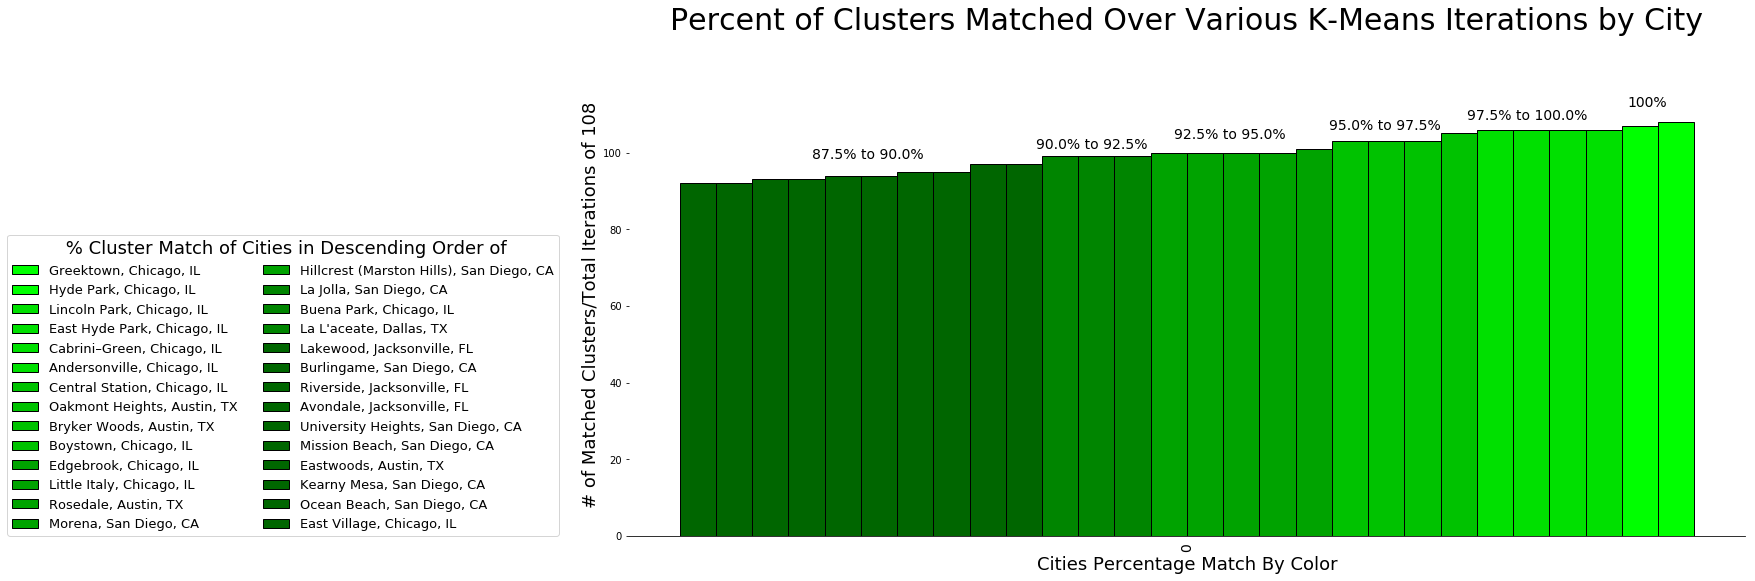

In [377]:
#Prepare for unstacked bar plot using artists layer.

# This plot will show the percentage of time each city showed up in the predictive KMeans
# Cluster. The plot is for those that appeared 87.5% or more which is 58 of 72 total 
# output clusters or greater.

ax = test_frame.plot(
    kind='bar',
    figsize=(20, 8),
    stacked=False,
    color=colors_plt,
    width=5,
    edgecolor=['black']*len(test_frame))

#Turn of spines of plot off on all side.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

#Plot annotation locations for percentages above bars.

i = -2.7     # Adjustment to center bar annotations
j=0          # Counter to obtain appropriate annot_list item

values_series_set=[87.5, 90.0, 92.5, 95.0, 97.5, 100] # List for annotation values
# Loop to find x and Y values for barplot annotations above bars
for items in values_series_set:
    if items != 100.0:
        plt.annotate(str(items)+'%'+' to '+str(items+2.5)+'%',
                     xy = (i+((annot_list[j]/2.)*.17),
                           items+11),
                     fontsize=14)
        i = (i + annot_list[j]*.17)
        j+=1
    else:   # For 100% value
        plt.annotate(str(items)+'%',
                     xy = (i+.25+((annot_list[j]/2.)*.2),
                           items+12),
                     fontsize=14)
        i = (i + annot_list[j]*.2)
        j+=1

#Set Tick Parameters to remove any extraneous information
ax.tick_params(
    axis='x',          # Changes apply to the x-axis
    which='both',      # Both major and minor ticks are affected
    left=False,        # Ticks along the bottom edge are off
    top=False,         # Ticks along the top edge are off
    bottom=False,      # Ticks along bottom are off
    labelleft=True,
    labelsize=14)      # Set Label and font size for y-axis
                                             
#create legend setting location, font, title, title_font, and anchor
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],
          title=' % Cluster Match of Cities in Descending Order of',
          title_fontsize = 18, 
          bbox_to_anchor=(-.31, -.015),
          loc='lower center',
          ncol=2, fontsize=13, fancybox=True)

# Setting title, x-axis label, and y-axis label as well as postion
plt.title("Percent of Clusters Matched Over Various K-Means Iterations by City",
          fontsize=30, y=1.15)
plt.xlabel("Cities Percentage Match By Color",
           fontsize=18)
plt.ylabel("# of Matched Clusters/Total Iterations of 108", horizontalalignment='right',
           y=1, fontsize=18 )


<h2 align=justify style="color:green"> <ins>Demographic Analysis of Cluster Matched Data</ins></h2><br>
    <span align='justify' style="font-size:14pt">Using booleans and sorting to finale selection of cities that best fit wants and needs</span>
    

In [320]:
#Creat List pf columns and create dataframe
final_list_df = pd.DataFrame(columns_list, columns=['Neighborhood'])
final_list_df.head()


Neighborhood
0     East Village, Chicago, IL
1    Ocean Beach, San Diego, CA
2    Kearny Mesa, San Diego, CA
3         Eastwoods, Austin, TX
4  Mission Beach, San Diego, CA

In [378]:
# Build a Demographics DataFrame by concatenating cities matching cluster prediction match
# Over 85%.
pd_final= pd.DataFrame(columns=chicago_filtered.columns) #DF with columns from a previous
                                                         #DF with Demographics

for i in range(len(final_list_df)):         #Iteration over cities in list
                                            #and matching with each demograpics DF then
                                            #appending to new DF.
            
    temp_df = chicago_filtered.loc[chicago_filtered['Neighborhood']==          #Chicago
                                   final_list_df['Neighborhood'][i]]
    
    pd_final = pd.concat([pd_final, temp_df])
    temp_df = austin_filtered.loc[austin_filtered['Neighborhood']==             #Austin
                                  final_list_df['Neighborhood'][i]]
    
    pd_final = pd.concat([pd_final, temp_df])
    temp_df = dallas_filtered.loc[dallas_filtered['Neighborhood']==             #Dallas
                                  final_list_df['Neighborhood'][i]]
    
    pd_final = pd.concat([pd_final, temp_df])
    temp_df = jacksonville_filtered.loc[jacksonville_filtered['Neighborhood']== #Jacksonville
                                        final_list_df['Neighborhood'][i]]
    
    pd_final = pd.concat([pd_final, temp_df])
    temp_df = sandiego_filtered.loc[sandiego_filtered['Neighborhood']==       #San Diego
                                     final_list_df['Neighborhood'][i]]
    
    pd_final = pd.concat([pd_final, temp_df])
    

Neighborhood   Latitude   Longitude Zip Code  \
30                 East Village, Chicago, IL  41.899811  -87.672294    60622   
22                Ocean Beach, San Diego, CA  32.749499 -117.247035    92107   
14                Kearny Mesa, San Diego, CA  32.828391 -117.144123    92111   
3                      Eastwoods, Austin, TX  30.290371  -97.726479    78705   
4               Mission Beach, San Diego, CA  32.770653 -117.251445    92109   
24         University Heights, San Diego, CA  32.757206 -117.147064    92116   
1                 Avondale, Jacksonville, FL  30.296769  -81.710315    32205   
4                Riverside, Jacksonville, FL  30.312904  -81.693893    32204   
19                 Burlingame, San Diego, CA  32.731622 -117.127946    92104   
11                Lakewood, Jacksonville, FL  30.263600  -81.639126    32207   
48                   La L'aceate, Dallas, TX  34.052234 -118.243685    90012   
21                   Buena Park, Chicago, IL  41.957676  -87.650714    60613   
3                    La Jolla, San Diego, CA  32.832811 -117.271272    92037   
20  Hillcrest (Marston Hills), San Diego, CA  32.743531 -117.158092    92103   
21                     Morena, San Diego, CA  32.767107 -117.194115    92110   
7                       Rosedale, Austin, TX  30.314395  -97.745744    78756   
45                 Little Italy, Chicago, IL  41.869540  -87.651133    60607   
31                    Edgebrook, Chicago, IL  41.997342  -87.762172    60646   
16                     Boystown, Chicago, IL  41.943998  -87.647385    60657   
0                   Bryker Woods, Austin, TX  30.302450  -97.753893    78703   
4                Oakmont Heights, Austin, TX  30.311722  -97.754573    78731   
24              Central Station, Chicago, IL  41.864608  -87.621538    60605   
1                 Andersonville, Chicago, IL  41.979572  -87.670077    60640   
23                Cabrini–Green, Chicago, IL  41.901091  -87.641464    60610   
29               East Hyde Park, Chicago, IL  41.796278  -87.585304    60615   
44                 Lincoln Park, Chicago, IL  41.925470  -87.648778    60614   
41                    Hyde Park, Chicago, IL  41.794767  -87.591675    60637   
37                    Greektown, Chicago, IL  41.878564  -87.647050    60661   

   MedianIncome CostOfLivingIndex MedianMortgageToIncomeRatio  \
30        38487             294.8                        22.3   
22        42660             356.2                        27.7   
14        42774             213.7                        24.1   
3         14740             185.5                        21.5   
4         45202             373.7                        29.2   
24        35401             240.3                        24.3   
1         34579              76.4                        20.0   
4         23957              79.3                        20.9   
19        31139             200.5                        26.5   
11        35568              91.2                        20.6   
48        20152             177.4                        25.5   
21        48381             232.3                        20.7   
3         68691             682.8                        26.4   
20        39578             358.2                        25.8   
21        40642             272.6                        24.3   
7         36978             188.5                        21.9   
45        40972             264.5                        21.2   
31        58232             268.6                        24.4   
16        55647             306.2                        20.1   
0         54591             326.0                        21.1   
4         62404             275.7                        22.3   
24        56151             243.7                        19.9   
1         32466             196.2                        20.9   
23        51294             278.0                        18.8   
29        31571             167.1                        23.3   
44        68324      

In [357]:
#Sort Descending on 'Median Income' and Limiting COst Of Living Index to less than 400
pd_final_sorted = pd_final.sort_values('MedianIncome', ascending=False)
pd_final_sorted['CostOfLivingIndex'] = pd_final_sorted['CostOfLivingIndex'].apply(lambda x: float(x))
pd_final_sorted['MedianIncome'] = pd_final_sorted['MedianIncome'].apply(lambda x: float(x))
pd_final_sorted_coli = pd_final_sorted.loc[
    pd_final_sorted[
        'CostOfLivingIndex']<400].sort_values(
    'MedianIncome',ascending = False
).reset_index(drop=True)
pd_final_sorted_coli=pd_final_sorted_coli.loc[pd_final_sorted_coli['MedianIncome']>40000]
pd_final_sorted_coli.head()


Neighborhood   Latitude  Longitude Zip Code  MedianIncome  \
0     Lincoln Park, Chicago, IL  41.925470 -87.648778    60614       68324.0   
1   Oakmont Heights, Austin, TX  30.311722 -97.754573    78731       62404.0   
2        Edgebrook, Chicago, IL  41.997342 -87.762172    60646       58232.0   
3  Central Station, Chicago, IL  41.864608 -87.621538    60605       56151.0   
4         Boystown, Chicago, IL  41.943998 -87.647385    60657       55647.0   

   CostOfLivingIndex MedianMortgageToIncomeRatio OwnerOccupiedHomesPercent  \
0              383.3                        18.0                      40.3   
1              275.7                        22.3                      59.3   
2              268.6                        24.4                      76.6   
3              243.7                        19.9                      42.7   
4              306.2                        20.1                      30.3   

  MedianRoomsInHome CollegeDegreePercent ProfessionalPercent Population  \
0               3.9                 78.4                66.1      65438   
1               5.4                 71.1                65.6      24068   
2               5.8                 37.1                41.7      27057   
3               3.3                 58.3                63.6      12688   
4               3.9                 72.7                63.9      66828   

  AverageHouseholdSize MedianAge MaleToFemaleRatio MarriedPercent  \
0                  1.7      31.0              97.2           34.7   
1                  2.0      37.4              94.6           51.7   
2                  2.4      42.3              85.1           59.4   
3                  1.8      35.2             109.7           39.9   
4                  1.6      30.9             104.0           29.0   

  DivorcedPercent WhitePercent BlackPercent AsianPercent  \
0             7.5         85.1          4.1          3.6   
1             9.7         84.9          0.8          6.1   
2             6.2         84.4          0.5          6.7   
3            11.6         53.3         30.7          7.9   
4             7.2         82.3          3.4          5.0   

  HispanicEthnicityPercent  
0                      5.3  
1                      6.7  
2                      6.7  
3                      4.4  
4                      7.5

In [355]:
full_pd=pd.DataFrame()
for i in range(len(pd_final_sorted_coli)):
                  pd_temp =  venues_merged.loc[
                      venues_merged['Neighborhood']== pd_final_sorted_coli['Neighborhood'][i]
                  ]
                  full_pd = pd.concat([full_pd, pd_temp])
full_pd.reset_index(drop=True, inplace=True)
full_pd.head()


Cluster Labels                  Neighborhood   Latitude  Longitude  \
0               1     Lincoln Park, Chicago, IL  41.925470 -87.648778   
1               1   Oakmont Heights, Austin, TX  30.311722 -97.754573   
2               1        Edgebrook, Chicago, IL  41.997342 -87.762172   
3               1  Central Station, Chicago, IL  41.864608 -87.621538   
4               1         Boystown, Chicago, IL  41.943998 -87.647385   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Mexican Restaurant           Coffee Shop      Sushi Restaurant   
1                  Park        Sandwich Place    Italian Restaurant   
2            Hobby Shop        Sandwich Place                   Spa   
3        History Museum      Football Stadium              Aquarium   
4               Gay Bar           Pizza Place    Mexican Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place         Hot Dog Joint           Music Venue   
1           Coffee Shop                  Café           Bridal Shop   
2        Ice Cream Shop         Grocery Store           Coffee Shop   
3                  Park          Burger Joint               Dog Run   
4        Sandwich Place                   Pub   Japanese Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant        Cosmetics Shop               Theater   
1                  Pool           Flower Shop                Bakery   
2                  Park            Restaurant                 Diner   
3                Museum      Sushi Restaurant         Historic Site   
4                   Gym                   Spa      Sushi Restaurant   

  10th Most Common Venue  
0                    Bar  
1                   Bank  
2     Salon / Barbershop  
3            Coffee Shop  
4            Coffee Shop

In [374]:
#Clean Up Dataframe
final_pd = pd.merge(full_pd, pd_final_sorted_coli, left_index=True, right_index=True)
final_pd.drop(['Cluster Labels', 'Neighborhood_y', 'Latitude_y', 'Longitude_y'], axis=1, inplace=True)
final_pd.rename(columns={'Neighborhood_x':'Neighborhood', 'Latitude_x':'Latitude', 'Longitude_x':'Longitude'}, inplace=True)
final_pd.head()


Neighborhood   Latitude  Longitude 1st Most Common Venue  \
0     Lincoln Park, Chicago, IL  41.925470 -87.648778    Mexican Restaurant   
1   Oakmont Heights, Austin, TX  30.311722 -97.754573                  Park   
2        Edgebrook, Chicago, IL  41.997342 -87.762172            Hobby Shop   
3  Central Station, Chicago, IL  41.864608 -87.621538        History Museum   
4         Boystown, Chicago, IL  41.943998 -87.647385               Gay Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop      Sushi Restaurant           Pizza Place   
1        Sandwich Place    Italian Restaurant           Coffee Shop   
2        Sandwich Place                   Spa        Ice Cream Shop   
3      Football Stadium              Aquarium                  Park   
4           Pizza Place    Mexican Restaurant        Sandwich Place   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Hot Dog Joint           Music Venue    Italian Restaurant   
1                  Café           Bridal Shop                  Pool   
2         Grocery Store           Coffee Shop                  Park   
3          Burger Joint               Dog Run                Museum   
4                   Pub   Japanese Restaurant                   Gym   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue Zip Code  \
0        Cosmetics Shop               Theater                    Bar    60614   
1           Flower Shop                Bakery                   Bank    78731   
2            Restaurant                 Diner     Salon / Barbershop    60646   
3      Sushi Restaurant         Historic Site            Coffee Shop    60605   
4                   Spa      Sushi Restaurant            Coffee Shop    60657   

   MedianIncome  CostOfLivingIndex MedianMortgageToIncomeRatio  \
0       68324.0              383.3                        18.0   
1       62404.0              275.7                        22.3   
2       58232.0              268.6                        24.4   
3       56151.0              243.7                        19.9   
4       55647.0              306.2                        20.1   

  OwnerOccupiedHomesPercent MedianRoomsInHome CollegeDegreePercent  \
0                      40.3               3.9                 78.4   
1                      59.3               5.4                 71.1   
2                      76.6               5.8                 37.1   
3                      42.7               3.3                 58.3   
4                      30.3               3.9                 72.7   

  ProfessionalPercent Population AverageHouseholdSize MedianAge  \
0                66.1      65438                  1.7      31.0   
1                65.6      24068                  2.0      37.4   
2                41.7      27057                  2.4      42.3   
3                63.6      12688                  1.8      35.2   
4                63.9      66828                  1.6      30.9   

  MaleToFemaleRatio MarriedPercent DivorcedPercent WhitePercent BlackPercent  \
0              97.2           34.7             7.5         85.1          4.1   
1              94.6           51.7             9.7         84.9          0.8   
2              85.1           59.4             6.2         84.4          0.5   
3             109.7           39.9            11.6         53.3         30.7   
4             104.0           29.0             7.2         82.3          3.4   

  AsianPercent HispanicEthnicityPercent  
0          3.6                      5.3  
1          6.1                      6.7  
2          6.7                      6.7  
3          7.9                      4.4  
4          5.0                      7.5

In [636]:
#Rename Columns
final_pd.rename(columns={
    'Neighborhood_x':'Neighborhood', 'Latitude_x':'Latitude', 'Longitude_x':'Longitude'
}).head()


Neighborhood Zip Code  MedianIncome  CostOfLivingIndex  \
0     Lincoln Park, Chicago, IL    60614       68324.0              383.3   
1   Oakmont Heights, Austin, TX    78731       62404.0              275.7   
2        Edgebrook, Chicago, IL    60646       58232.0              268.6   
3  Central Station, Chicago, IL    60605       56151.0              243.7   
4         Boystown, Chicago, IL    60657       55647.0              306.2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Mexican Restaurant           Coffee Shop      Sushi Restaurant   
1                  Park        Sandwich Place    Italian Restaurant   
2            Hobby Shop        Sandwich Place                   Spa   
3        History Museum      Football Stadium              Aquarium   
4               Gay Bar           Pizza Place    Mexican Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place         Hot Dog Joint           Music Venue   
1           Coffee Shop                  Café           Bridal Shop   
2        Ice Cream Shop         Grocery Store           Coffee Shop   
3                  Park          Burger Joint               Dog Run   
4        Sandwich Place                   Pub   Japanese Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant        Cosmetics Shop               Theater   
1                  Pool           Flower Shop                Bakery   
2                  Park            Restaurant                 Diner   
3                Museum      Sushi Restaurant         Historic Site   
4                   Gym                   Spa      Sushi Restaurant   

  10th Most Common Venue MedianMortgageToIncomeRatio  \
0                    Bar                        18.0   
1                   Bank                        22.3   
2     Salon / Barbershop                        24.4   
3            Coffee Shop                        19.9   
4            Coffee Shop                        20.1   

  OwnerOccupiedHomesPercent MedianRoomsInHome CollegeDegreePercent  \
0                      40.3               3.9                 78.4   
1                      59.3               5.4                 71.1   
2                      76.6               5.8                 37.1   
3                      42.7               3.3                 58.3   
4                      30.3               3.9                 72.7   

  ProfessionalPercent Population AverageHouseholdSize MedianAge  \
0                66.1      65438                  1.7      31.0   
1                65.6      24068                  2.0      37.4   
2                41.7      27057                  2.4      42.3   
3                63.6      12688                  1.8      35.2   
4                63.9      66828                  1.6      30.9   

  MaleToFemaleRatio MarriedPercent DivorcedPercent WhitePercent BlackPercent  \
0              97.2           34.7             7.5         85.1          4.1   
1              94.6           51.7             9.7         84.9          0.8   
2              85.1           59.4             6.2         84.4          0.5   
3             109.7           39.9            11.6         53.3         30.7   
4             104.0           29.0             7.2         82.3          3.4   

  AsianPercent HispanicEthnicityPercent   Latitude  Longitude  MSE Values  \
0          3.6                      5.3  41.925470 -87.648778    0.000069   
1          6.1                      6.7  30.311722 -97.754573    0.000083   
2          6.7                      6.7  41.997342 -87.762172    0.000132   
3          7.9                      4.4  41.864608 -87.621538    0.000105   
4          5.0                      7.5  41.943998 -87.647385    0.000073   

   MSE Average  % MSE Error  Std. Dev from Mean MSE  % MSE Error/n  \
0     0.000227     0.303774               -0.899860       0.303774   
1     0.000227     0.364076   

In [376]:
#Rearrange Dataframe
columns_list_2 = []
columns_list = list(final_pd.columns)
columns_list_2.append(columns_list[0])
columns_list_2.append(columns_list[13:16])
columns_list_2.append(columns_list[3:13])
columns_list_2.append(columns_list[16:])
columns_list_2.append(columns_list[1:3])
new_column_list = [item for items in columns_list_2[1:] for item in items]
new_column_list.insert(0,columns_list[0])
final_pd = final_pd[new_column_list]
final_pd


Neighborhood Zip Code  MedianIncome  CostOfLivingIndex  \
0      Lincoln Park, Chicago, IL    60614       68324.0              383.3   
1    Oakmont Heights, Austin, TX    78731       62404.0              275.7   
2         Edgebrook, Chicago, IL    60646       58232.0              268.6   
3   Central Station, Chicago, IL    60605       56151.0              243.7   
4          Boystown, Chicago, IL    60657       55647.0              306.2   
5         Greektown, Chicago, IL    60661       54698.0              253.6   
6       Bryker Woods, Austin, TX    78703       54591.0              326.0   
7     Cabrini–Green, Chicago, IL    60610       51294.0              278.0   
8        Buena Park, Chicago, IL    60613       48381.0              232.3   
9   Mission Beach, San Diego, CA    92109       45202.0              373.7   
10    Kearny Mesa, San Diego, CA    92111       42774.0              213.7   
11    Ocean Beach, San Diego, CA    92107       42660.0              356.2   
12     Little Italy, Chicago, IL    60607       40972.0              264.5   
13         Morena, San Diego, CA    92110       40642.0              272.6   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Mexican Restaurant           Coffee Shop      Sushi Restaurant   
1                   Park        Sandwich Place    Italian Restaurant   
2             Hobby Shop        Sandwich Place                   Spa   
3         History Museum      Football Stadium              Aquarium   
4                Gay Bar           Pizza Place    Mexican Restaurant   
5            Coffee Shop      Greek Restaurant    Italian Restaurant   
6                   Park   American Restaurant           Gas Station   
7            Coffee Shop           Pizza Place                   Gym   
8            Coffee Shop                   Bar    Mexican Restaurant   
9                  Beach                   Bar                  Park   
10          Dessert Shop                 Hotel      Sushi Restaurant   
11                  Café    Mexican Restaurant               Brewery   
12        Sandwich Place    Salon / Barbershop    Italian Restaurant   
13                   Gym        Sandwich Place           Coffee Shop   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0               Pizza Place         Hot Dog Joint           Music Venue   
1               Coffee Shop                  Café           Bridal Shop   
2            Ice Cream Shop         Grocery Store           Coffee Shop   
3                      Park          Burger Joint               Dog Run   
4            Sandwich Place                   Pub   Japanese Restaurant   
5   New American Restaurant           Pizza Place        Sandwich Place   
6             Grocery Store    Italian Restaurant        Sandwich Place   
7      Gym / Fitness Center         Deli / Bodega        Sandwich Place   
8                      Park      Asian Restaurant        Sandwich Place   
9                Taco Place       Harbor / Marina           Pizza Place   
10                      Gym        Sandwich Place   Sporting Goods Shop   
11              Coffee Shop                   Bar               Dog Run   
12                     Park      Sushi Restaurant    Mexican Restaurant   
13   Furniture / Home Store                   Bar            Donut Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Italian Restaurant        Cosmetics Shop               Theater   
1                   Pool           Flower Shop                Bakery   
2                   Park            Restaurant                 Diner   
3                 Museum      Sushi Restaurant         Historic Site   
4                    Gym                   Spa      Sushi Restaurant   
5                   Café                   Bar        Breakfast Spot   
6            Coffee Shop              Pharmacy           Yoga Studio   
7             Food Truck            Restaurant            Nail Sal

<span style="font-size:16pt; color:red"><ins>MSE Error Evaluation:</ins></span><br>
<span style="font-size:14pt; color:black">MSE Error, MSE Average over dataset, % average error</span>

In [520]:
#creation of a list of MSE for all neighborhoods from ideal average onehot
mse_value_list = []
for nb in final_pd['Neighborhood']:
    temp_list_1 = (venues_grouped.loc[
        venues_grouped['Neighborhood']==nb
    ].values)[0][1:]
    new_list_2 = new_list[:]   #new list copy -- new list is average one hot data of favorite cities
    temp_list_1.resize(1,411)  #reshape for calculation
    mse_value = (((temp_list_1-new_list)**2).sum())/len(new_list_2[0])  #MSE calculation
    mse_value_list.append(mse_value)
final_pd['MSE Values']=mse_value_list   #Add to data frame


In [528]:
import seaborn as sns   #Seaborn import for distribution plots


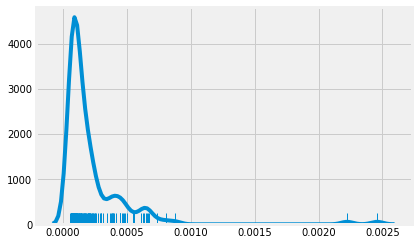

In [588]:
#Seaborn distribution plot of MSE
sns.distplot(mse_value_list, hist=False, rug=True);


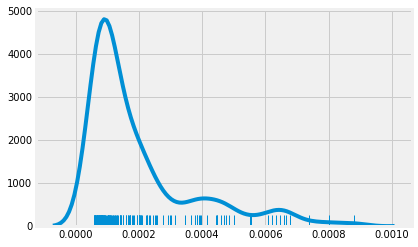

In [587]:
#Seaborn distribution plot of MSE after removing outliers over .001
mse_value_list_no_outlier = [number for number in mse_value_list if number <= .001]
sns.distplot(mse_value_list_no_outlier, hist=False, rug=True);


In [517]:
#Mean MSE Value from final ideal cities list
final_pd['MSE Values'].mean()


9.032629981172154e-05

In [541]:
mse_avg = sum(mse_value_list)/len(mse_value_list)    #MSE Average
mse_avg_list = [mse_avg for i in range(len(final_pd))]
final_pd['MSE Average'] = mse_avg_list


In [565]:
#Standard Deviation of the MSE of Ideal Cities
std_dev_grouped = np.std(mse_value_list_no_outlier)
std_dev_grouped


0.00017601405369793398

In [635]:
final_pd['% MSE Error'] =(final_pd['MSE Values']-final_pd['MSE Average'])/final_pd['MSE Average']+1
final_pd[['Neighborhood', 'MSE Values', 'MSE Average', '% MSE Error']].head()


Neighborhood  MSE Values  MSE Average  % MSE Error
0     Lincoln Park, Chicago, IL    0.000069     0.000227     0.303774
1   Oakmont Heights, Austin, TX    0.000083     0.000227     0.364076
2        Edgebrook, Chicago, IL    0.000132     0.000227     0.580793
3  Central Station, Chicago, IL    0.000105     0.000227     0.461634
4         Boystown, Chicago, IL    0.000073     0.000227     0.321830

In [578]:
#Added MSE Data ro Final Dataframe
final_pd['Std. Dev from Mean MSE'] = (
    final_pd['MSE Values'] - final_pd['MSE Average']
)/std_dev_grouped
final_pd[['Neighborhood', 'MSE Values', 'MSE Average', '% MSE Error', 'Std. Dev from Mean MSE']]


Neighborhood  MSE Values  MSE Average  % MSE Error  \
0      Lincoln Park, Chicago, IL    0.000069     0.000227     0.303774   
1    Oakmont Heights, Austin, TX    0.000083     0.000227     0.364076   
2         Edgebrook, Chicago, IL    0.000132     0.000227     0.580793   
3   Central Station, Chicago, IL    0.000105     0.000227     0.461634   
4          Boystown, Chicago, IL    0.000073     0.000227     0.321830   
5         Greektown, Chicago, IL    0.000059     0.000227     0.260961   
6       Bryker Woods, Austin, TX    0.000085     0.000227     0.375636   
7     Cabrini–Green, Chicago, IL    0.000082     0.000227     0.360786   
8        Buena Park, Chicago, IL    0.000070     0.000227     0.309842   
9   Mission Beach, San Diego, CA    0.000194     0.000227     0.851356   
10    Kearny Mesa, San Diego, CA    0.000093     0.000227     0.410332   
11    Ocean Beach, San Diego, CA    0.000078     0.000227     0.340913   
12     Little Italy, Chicago, IL    0.000064     0.000227     0.279434   
13         Morena, San Diego, CA    0.000077     0.000227     0.337298   

    Std. Dev from Mean MSE  
0                -0.899860  
1                -0.821921  
2                -0.541817  
3                -0.695829  
4                -0.876523  
5                -0.955195  
6                -0.806980  
7                -0.826173  
8                -0.892017  
9                -0.192119  
10               -0.762136  
11               -0.851858  
12               -0.931319  
13               -0.856530

In [589]:
#Mean MSE values for ideal cities
final_pd['MSE Values'].mean()


9.032629981172154e-05

In [590]:
#Mean Number of Standard Deviations from the Mean
final_pd['Std. Dev from Mean MSE'].mean()


-0.7793054900256278

In [577]:
final_pd.head()


Neighborhood Zip Code  MedianIncome  CostOfLivingIndex  \
0     Lincoln Park, Chicago, IL    60614       68324.0              383.3   
1   Oakmont Heights, Austin, TX    78731       62404.0              275.7   
2        Edgebrook, Chicago, IL    60646       58232.0              268.6   
3  Central Station, Chicago, IL    60605       56151.0              243.7   
4         Boystown, Chicago, IL    60657       55647.0              306.2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Mexican Restaurant           Coffee Shop      Sushi Restaurant   
1                  Park        Sandwich Place    Italian Restaurant   
2            Hobby Shop        Sandwich Place                   Spa   
3        History Museum      Football Stadium              Aquarium   
4               Gay Bar           Pizza Place    Mexican Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place         Hot Dog Joint           Music Venue   
1           Coffee Shop                  Café           Bridal Shop   
2        Ice Cream Shop         Grocery Store           Coffee Shop   
3                  Park          Burger Joint               Dog Run   
4        Sandwich Place                   Pub   Japanese Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant        Cosmetics Shop               Theater   
1                  Pool           Flower Shop                Bakery   
2                  Park            Restaurant                 Diner   
3                Museum      Sushi Restaurant         Historic Site   
4                   Gym                   Spa      Sushi Restaurant   

  10th Most Common Venue MedianMortgageToIncomeRatio  \
0                    Bar                        18.0   
1                   Bank                        22.3   
2     Salon / Barbershop                        24.4   
3            Coffee Shop                        19.9   
4            Coffee Shop                        20.1   

  OwnerOccupiedHomesPercent MedianRoomsInHome CollegeDegreePercent  \
0                      40.3               3.9                 78.4   
1                      59.3               5.4                 71.1   
2                      76.6               5.8                 37.1   
3                      42.7               3.3                 58.3   
4                      30.3               3.9                 72.7   

  ProfessionalPercent Population AverageHouseholdSize MedianAge  \
0                66.1      65438                  1.7      31.0   
1                65.6      24068                  2.0      37.4   
2                41.7      27057                  2.4      42.3   
3                63.6      12688                  1.8      35.2   
4                63.9      66828                  1.6      30.9   

  MaleToFemaleRatio MarriedPercent DivorcedPercent WhitePercent BlackPercent  \
0              97.2           34.7             7.5         85.1          4.1   
1              94.6           51.7             9.7         84.9          0.8   
2              85.1           59.4             6.2         84.4          0.5   
3             109.7           39.9            11.6         53.3         30.7   
4             104.0           29.0             7.2         82.3          3.4   

  AsianPercent HispanicEthnicityPercent   Latitude  Longitude  MSE Values  \
0          3.6                      5.3  41.925470 -87.648778    0.000069   
1          6.1                      6.7  30.311722 -97.754573    0.000083   
2          6.7                      6.7  41.997342 -87.762172    0.000132   
3          7.9                      4.4  41.864608 -87.621538    0.000105   
4          5.0                      7.5  41.943998 -87.647385    0.000073   

   MSE Average  % MSE Error  Std. Dev from Mean MSE  % MSE Error/n  \
0     0.000227     0.303774               -0.899860       0.303774   
1     0.000227     0.364076   



<h2 align=justify style="color:green"> Mapping of Matched Neighborhoods</h2>
Use Folium to matched final cities in Dataframe

    

<span style="font-size:16pt; color:red"><ins>San Diego, CA Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Ideal Neighborhoods</span>

In [400]:
#Scaled down function for local clustering of ideal neighborhoods.
def ideal_folium_map(latitude, longitude, zoom_start):
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
    markers_colors = []
    for lat, lon, poi in zip(final_pd['Latitude'],
                                      final_pd['Longitude'],
                                      final_pd['Neighborhood']
                                      ):
        label = folium.Popup(str(poi), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=7,
            popup=label,
            color='red',
            fill=True,
            fill_color='gree',
            fill_opacity=0.7).add_to(map_clusters)

    return map_clusters


In [401]:
#Use Nominatim from Geocoders to find lonigude and laatitude of each city
address = 'San Diego, CA'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Chicago, IL are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Chicago, IL are 32.7174209, -117.1627714.


In [402]:
#Map CLusters in San Diego, CA
map_clusters = ideal_folium_map(latitude, longitude, zoom_start=11)
map_clusters


In [403]:
map_clusters.save('san_diego_ideal_map.html')

<span style="font-size:16pt; color:red"><ins>Austin, TX Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Ideal Neighborhoods</span>

In [404]:
#Use Nominatim from Geocoders to find lonigude and laatitude of each city
address = 'Austin, TX'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Austin, TX are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Austin, TX are 30.2711286, -97.7436995.


In [405]:
#Ideal Locations in Austin, TX
map_clusters = ideal_folium_map(latitude, longitude, zoom_start=11)
map_clusters


In [406]:
map_clusters.save('austin_ideal_map.html')

<span style="font-size:16pt; color:red"><ins>Chicago, IL Neighborhood Map:</ins></span><br>
<span style="font-size:14pt; color:black">Ideal Neighborhoods</span>

In [407]:
#Use Nominatim from Geocoders to find lonigude and laatitude of each city
address = 'Chicago, IL'
geolocator = Nominatim(user_agent = 'explorer')
location=geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates on Chicago, IL are {}, {}.'.format(latitude, longitude))


The geographical coordinates on Chicago, IL are 41.8755616, -87.6244212.


In [408]:
#Ideal Locations in Chicago, IL
map_clusters = ideal_folium_map(latitude, longitude, zoom_start=11)
map_clusters


In [ ]:
map_clusters.save('chicago_ideal_map.html')

<h2>Thank you very much for using our relocation Service!!!<br>
Good Luck with your Move and your future!!<br>
Sincerely Gennaro -- The Relocation Suggestion Expert!<h2>